Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.
Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range



In [1]:
# Importing Necessary Libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing Dataset.
df1=pd.DataFrame(pd.read_excel("Country-Code.xlsx"))
df1


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
file='https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv'
df2=pd.read_csv(file)
df2

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte

In [6]:
import chardet

with open('zomato1.csv', 'rb') as filedata:
    result = chardet.detect(filedata.read(100000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.49068171335281274,
 'language': 'Turkish'}

In [7]:
df2=pd.read_csv('zomato1.csv', encoding='ISO-8859-1')
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [8]:
data=pd.merge(df1,df2)
data

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [9]:
# we have 9551 rows and 22 columns in our Dataset.

In [10]:
# To Check the Datashape information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [11]:
# we can see 3 float values,5 int values and 14 objectvalues.

In [12]:
# To Check the Columns name.
data.columns


Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [13]:
#information about columns:

# Restaurant Id: Unique id of every restaurant across various cities of the world
#Restaurant Name: Name of the restaurant
# Country Code: code of the Country in which restaurant is located
# Country:Country in which restaurant is located
#City: City in which restaurant is located
# Address: Address of the restaurant
# Locality: Location in the city
# Locality Verbose: Detailed description of the locality
# Longitude: Longitude coordinate of the restaurant&#39;s location
#Latitude: Latitude coordinate of the restaurant&#39;s location
# Cuisines: Cuisines offered by the restaurant
# Average Cost for two: Cost for two people in different currencies ��
# Currency: Currency of the country
# Has Table booking: yes/no
# Has Online delivery: yes/ no
# Is delivering: yes/ no
# Switch to order menu: yes/no
# Price range: range of price of food
# Aggregate Rating: Average rating out of 5
# Rating color: depending upon the average rating color
# Rating text: text on the basis of rating of rating
# Votes: Number of ratings casted by people


# Data intergrity Check

In [14]:
# To Check Null Values.

data.isnull().sum()           # These are Null values  present in the Dataset(in Each Column)

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
# To check for widespace,special characters in the Dataset.
data.isin(['NA','n/a','-',',','?',' ']).any()

Country Code            False
Country                 False
Restaurant ID           False
Restaurant Name         False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                False
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

In [16]:
# There is No special Characters in the Dataset.

In [17]:
# To Check the Number of Unique values present in the Dataset
data.nunique()

Country Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [18]:
# since the Restaurant-Id hs only unique values,deleting this column fromthe dataset.
data.drop(columns=['Restaurant ID'],axis=1,inplace=True)

# statistical summary

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Country Code,9551.0,18.365616,56.750546,1.000000,1.000000,1.000000,1.000000,216.000000
Longitude,9551.0,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089
Latitude,9551.0,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.976980
Average Cost for two,9551.0,1199.210763,16121.183073,0.000000,250.000000,400.000000,700.000000,800000.000000
Price range,9551.0,1.804837,0.905609,1.000000,1.000000,2.000000,2.000000,4.000000
Aggregate rating,9551.0,2.666370,1.516378,0.000000,2.500000,3.200000,3.700000,4.900000
Votes,9551.0,156.909748,430.169145,0.000000,5.000000,31.000000,131.000000,10934.000000


In [20]:
# count remains same for all the columns.
# Average cost for Two :STD is higher than mean ,skewness is present.and max is very high,so outliers are present.
# votes : 75% and max is in high range,outliers is also present
# longitude column : also max is very high,outliers is present,will analyze further in EDA.

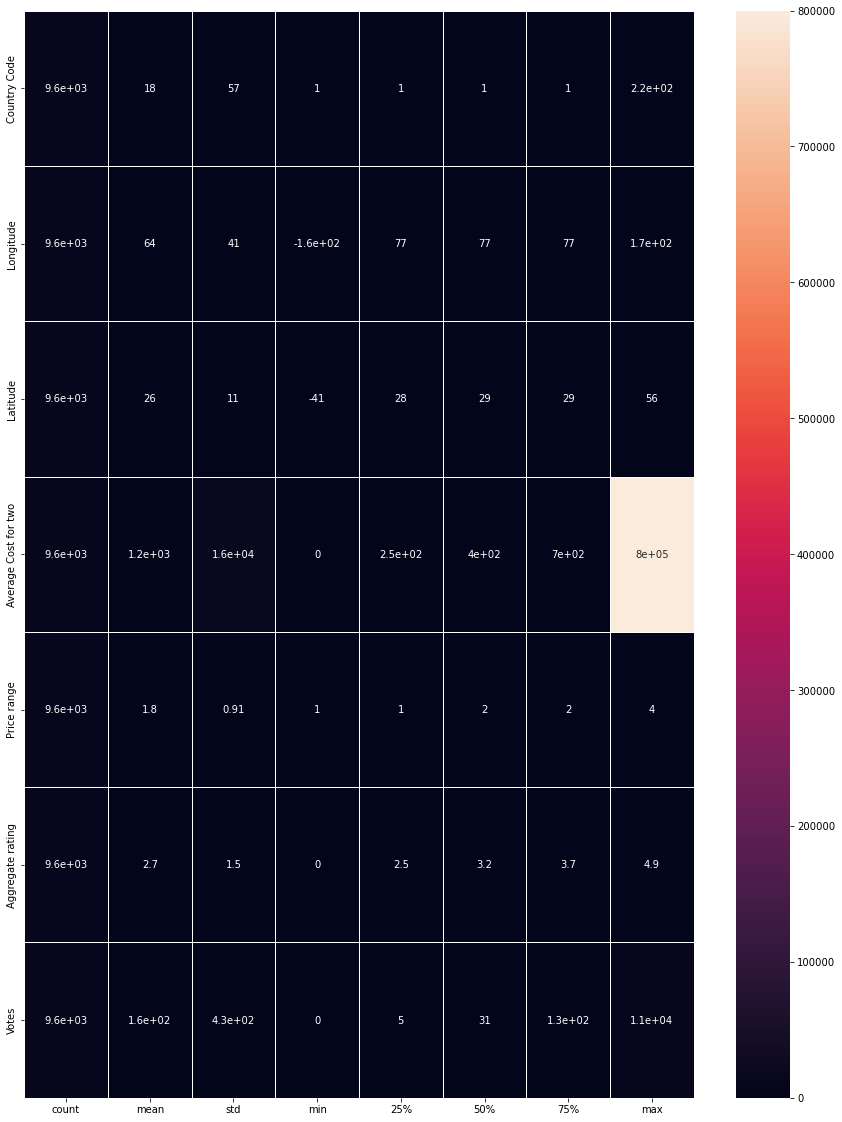

In [21]:
# Visualizing the statistical summary using heatmap
stat=data.describe().T
plt.figure(figsize=(15,20))
sns.heatmap(data=stat,annot=True,linewidths=0.5)
plt.show()

In [22]:
# Average cost for 2 max is in very high range.

# Categorising the column before EDA.

In [23]:
data.columns

Index(['Country Code', 'Country', 'Restaurant Name', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [24]:
data_numerical=data[['Country Code','Longitude','Latitude','Average Cost for two','Price range','Aggregate rating','Votes']].copy()

In [25]:
data_numerical

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,1,78.011544,27.161661,850,3,3.9,140
1,1,0.000000,0.000000,700,2,3.5,71
2,1,78.011608,27.160832,500,2,3.6,94
3,1,77.998092,27.195928,400,2,4.0,87
4,1,78.007553,27.201725,1000,3,4.2,177
...,...,...,...,...,...,...,...
9546,216,-92.335523,42.498400,10,1,3.7,101
9547,216,-92.335769,42.497919,10,1,3.5,58
9548,216,-92.323400,42.465580,25,2,3.9,156
9549,216,-80.529488,40.396043,25,2,3.9,156


In [26]:
data_cat=data[['Country', 'Restaurant Name', 'City', 'Address','Locality', 'Locality Verbose','Cuisines',
              'Currency', 'Has Table booking','Has Online delivery', 'Is delivering now', 'Switch to order menu','Rating color', 'Rating text']].copy()

In [27]:
data_cat

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,India,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra","North Indian, Mughlai",Indian Rupees(Rs.),No,No,No,No,Yellow,Good
1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra","North Indian, Mughlai",Indian Rupees(Rs.),No,No,No,No,Yellow,Good
2,India,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",North Indian,Indian Rupees(Rs.),No,No,No,No,Yellow,Good
3,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",Rajasthani,Indian Rupees(Rs.),No,No,No,No,Green,Very Good
4,India,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra","North Indian, Chinese, Mughlai",Indian Rupees(Rs.),No,No,No,No,Green,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,United States,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo","American, Bar Food",Dollar($),No,No,No,No,Yellow,Good
9547,United States,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",Thai,Dollar($),No,No,No,No,Yellow,Good
9548,United States,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo","Japanese, Steak, Sushi",Dollar($),No,No,No,No,Yellow,Good
9549,United States,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton","Burger, Greek, Sandwich",Dollar($),No,No,No,No,Yellow,Good


# EDA

# Univariate Analysis

In [28]:
data_numerical.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64


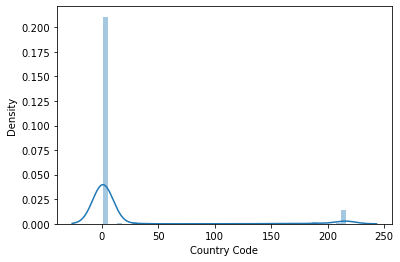

In [29]:
print(data_numerical['Country Code'].value_counts())
sns.distplot(data_numerical['Country Code'])
plt.show()

 0.000000      498
 77.353663      19
 77.230412      12
 77.088688      10
 77.251426       9
              ... 
 77.303872       1
 77.307939       1
 77.299597       1
 77.299004       1
-124.175346      1
Name: Longitude, Length: 8120, dtype: int64


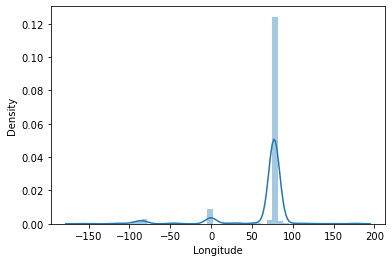

In [30]:
print(data_numerical['Longitude'].value_counts())
sns.distplot(data_numerical['Longitude'])
plt.show()

In [31]:
# follows normal distribution from 50 to 100 range.
# both skewness is present.

0.000000     498
28.574309     16
28.551456      9
28.574300      9
28.597103      8
            ... 
28.701519      1
28.699157      1
28.694336      1
28.699116      1
43.678998      1
Name: Latitude, Length: 8677, dtype: int64


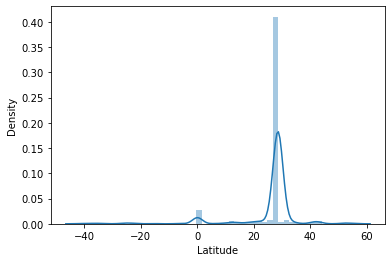

In [32]:
print(data_numerical['Latitude'].value_counts())
sns.distplot(data_numerical['Latitude'])
plt.show()

In [33]:
# follows normal distribution from 20to 40 range,both side skewness is present.

500       900
300       897
400       857
200       687
600       652
         ... 
70000       1
165000      1
450000      1
120000      1
4300        1
Name: Average Cost for two, Length: 140, dtype: int64


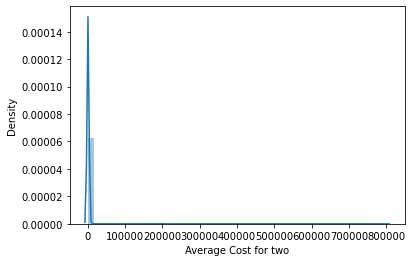

In [34]:
print(data_numerical['Average Cost for two'].value_counts())
sns.distplot(data_numerical['Average Cost for two'])
plt.show()

In [35]:
# rightskewness is present in the columns.

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


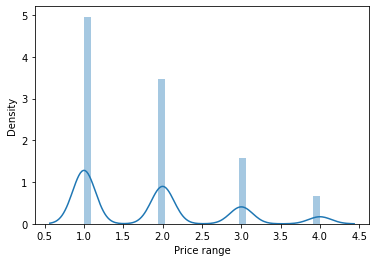

In [36]:
print(data_numerical['Price range'].value_counts())
sns.distplot(data_numerical['Price range'])
plt.show()

In [37]:
# The Data follows normal distribution 

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


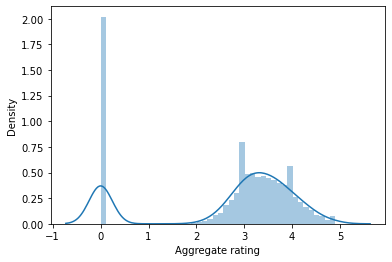

In [38]:

print(data_numerical['Aggregate rating'].value_counts())
sns.distplot(data_numerical['Aggregate rating'])
plt.show()

In [39]:
# follows normal distribution from range 2 to 5 then followed skewness both sides.

0       1094
1        483
2        327
3        244
4        207
        ... 
1801       1
1333       1
1863       1
1134       1
575        1
Name: Votes, Length: 1012, dtype: int64


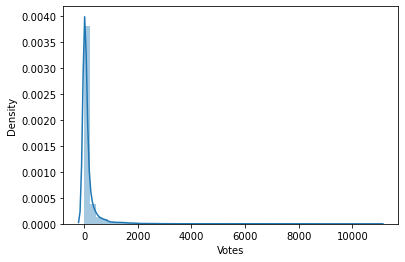

In [40]:

print(data_numerical['Votes'].value_counts())
sns.distplot(data_numerical['Votes'])
plt.show()

In [41]:
# we have normal distribution only till 2000 ,followed by skewness.

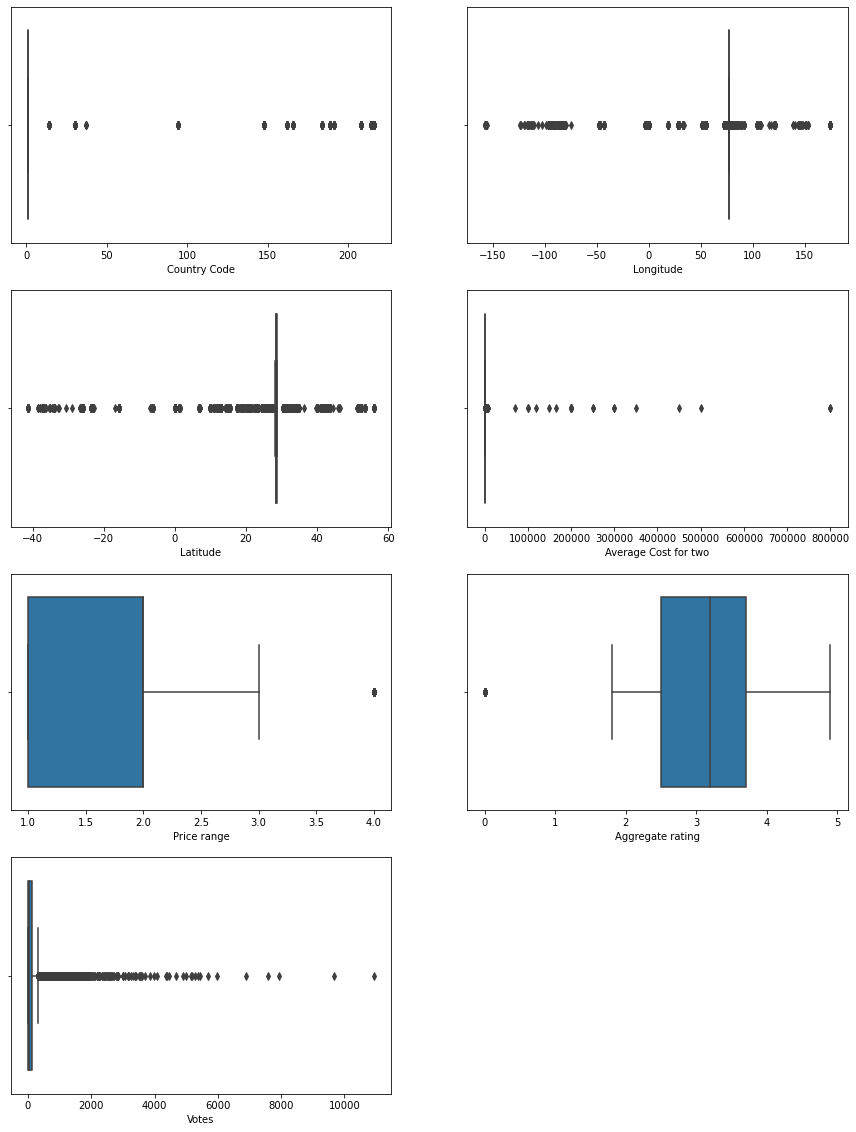

In [42]:
# all continous columns have lots of outliers,rechecking the same using boxplot
plt.figure(figsize=(15,20))
pltno=1
for columns in data_numerical:
    if pltno<=7:
        ax=plt.subplot(4,2,pltno)
        sns.boxplot(data_numerical[columns])
        plt.xlabel(columns)
    pltno+=1
plt.show()


In [43]:
# we have lots of outliers ,will treat it shortly.

In [44]:
data_cat.columns

Index(['Country', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Rating color', 'Rating text'],
      dtype='object')

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


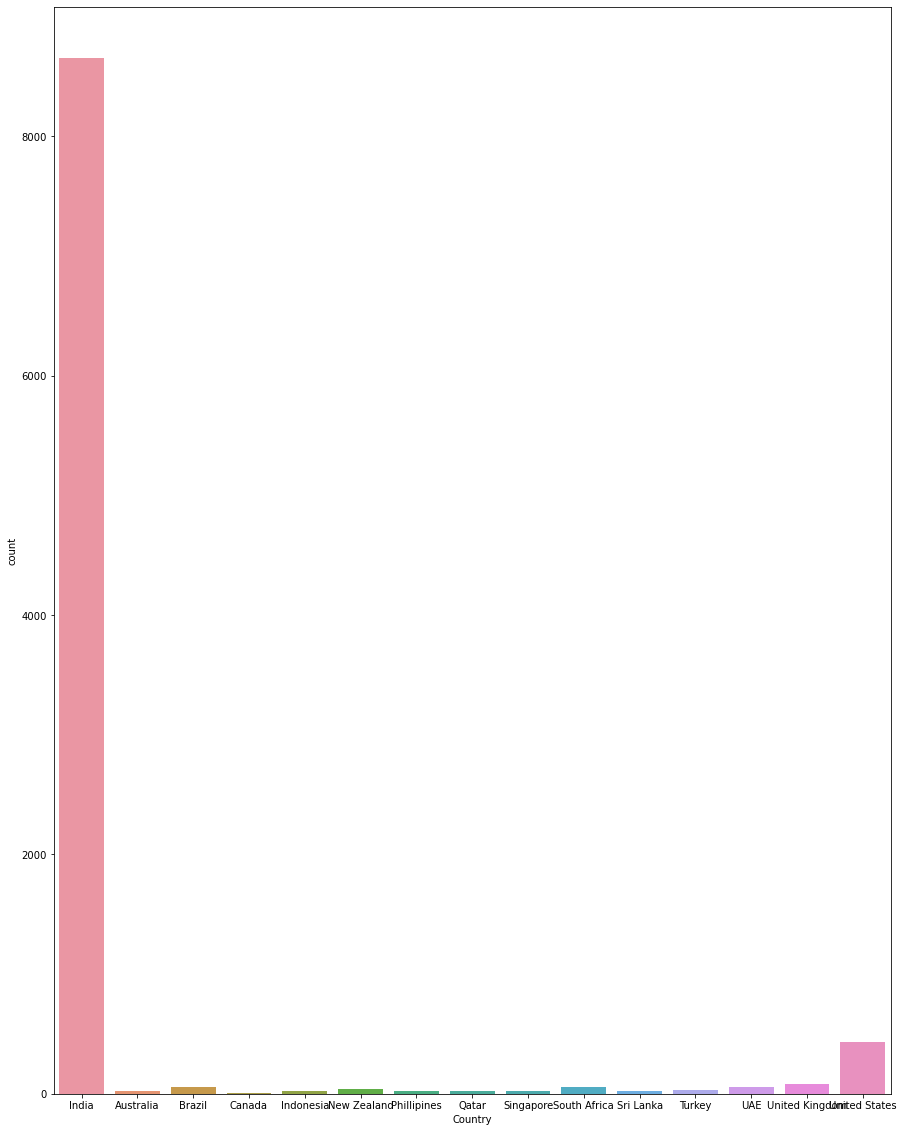

In [45]:
plt.figure(figsize=(15,20))
print(data_cat['Country'].value_counts())
sns.countplot(data_cat['Country'])
plt.show()

In [46]:
# we have More Indian Restaurants ,
# we have less Restaurants in Canada.

Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
                                      ..
Chor Bizarre - Hotel Broadway          1
Thugs - Hotel Broadway                 1
The Kylin Experience - Holiday Inn     1
Cafe on 3 - Holiday Inn                1
Fishpatrick's Crabby Cafe              1
Name: Restaurant Name, Length: 7446, dtype: int64


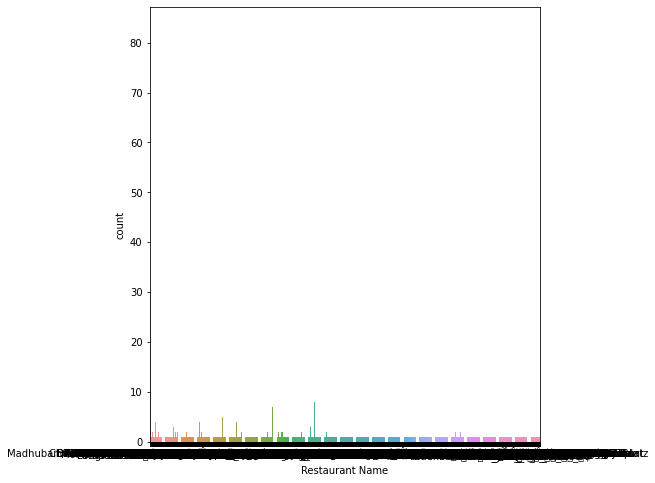

In [47]:
plt.figure(figsize=(7,8))
print(data_cat['Restaurant Name'].value_counts())
sns.countplot(data_cat['Restaurant Name'])
plt.show()

In [48]:
# since the Restaurant name is unique and doesnt contribute much to the dataset,removing the columns fromthe data.
data.drop(columns=['Restaurant Name'],axis=1,inplace=True)
data_cat.drop(columns=['Restaurant Name'],axis=1,inplace=True)

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Vineland Station       1
Yorkton                1
Bandung                1
Quezon City            1
Winchester Bay         1
Name: City, Length: 141, dtype: int64


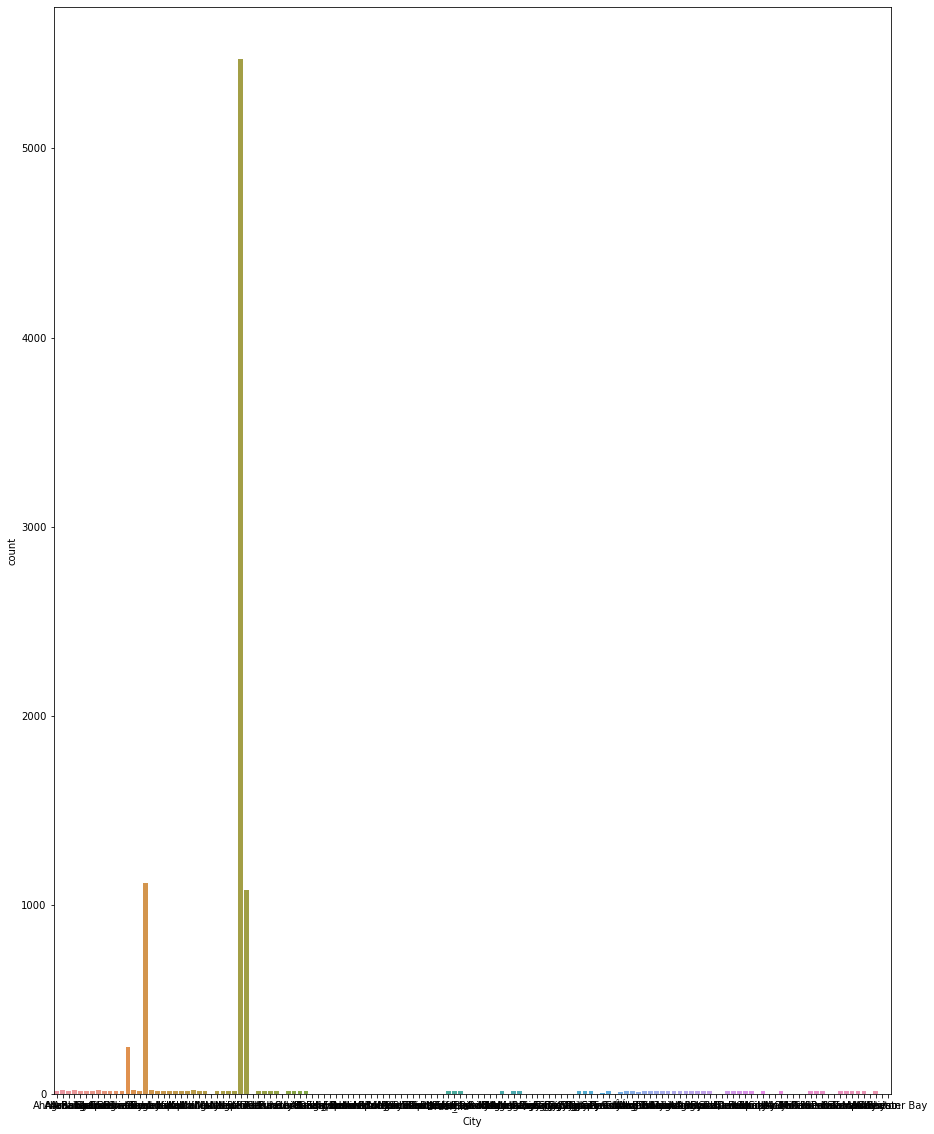

In [49]:
plt.figure(figsize=(15,20))
print(data_cat['City'].value_counts())
sns.countplot(data_cat['City'])
plt.show()

In [50]:
# we have most of the Restaurants in the city Newdelhi 

In [51]:
print(data_cat['Address'].value_counts())

Sector 41, Noida                                                                      11
Dilli Haat, INA, New Delhi                                                            11
Greater Kailash (GK) 1, New Delhi                                                     10
The Imperial, Janpath, New Delhi                                                       9
The Lalit, Barakhamba Avenue, Barakhamba Road, New Delhi                               8
                                                                                      ..
G-4, Local Shopping Complex, Gujranwala Town, New Delhi                                1
State Bank Colony, Near Nanak Piau Gurudwara, GTK Road, Gujranwala Town, New Delhi     1
Shop 6 & 7, DDA Market, Near Pentamed Hospital, Gujranwala Town, New Delhi             1
A-199, Gujranwala Town, New Delhi                                                      1
196 Bayfront Loop, Winchester Bay, OR 97467                                            1
Name: Address, Length

In [52]:
# we have almost 8918 unique address,so deleting this column from the Dataset.
data.drop(columns=['Address'],axis=1,inplace=True)
data_cat.drop(columns=['Address'],axis=1,inplace=True)

In [53]:
data_cat.columns

Index(['Country', 'City', 'Locality', 'Locality Verbose', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [54]:
data_cat['Locality'].value_counts()

Connaught Place    122
Rajouri Garden      99
Shahdara            87
Defence Colony      86
Pitampura           85
                  ... 
Waltair Uplands      1
Armidale             1
Balingup             1
Beechworth           1
Winchester Bay       1
Name: Locality, Length: 1208, dtype: int64

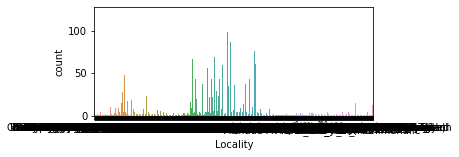

In [55]:
plt.figure(figsize=(5,2))
sns.countplot(data_cat['Locality'])
plt.show()

In [56]:
data_cat['Locality Verbose'].value_counts()

Connaught Place, New Delhi             122
Rajouri Garden, New Delhi               99
Shahdara, New Delhi                     87
Defence Colony, New Delhi               86
Pitampura, New Delhi                    85
                                      ... 
Hotel Maurya, Lodipur, Patna             1
Maurya Lok, Fraser Road Area, Patna      1
Patliputra Colony, Patna                 1
Heritage Town, Puducherry                1
Winchester Bay, Winchester Bay           1
Name: Locality Verbose, Length: 1265, dtype: int64

In [57]:
# Locality and LocalityVerbose columns have both same values,hence deleting this column

In [58]:
data.drop(columns=['Locality Verbose'],axis=1,inplace=True)
data_cat.drop(columns=['Locality Verbose'],axis=1,inplace=True)

North Indian                                 936
North Indian, Chinese                        511
Fast Food                                    354
Chinese                                      354
North Indian, Mughlai                        334
                                            ... 
Cafe, Mexican, Continental                     1
North Indian, Continental, Asian, Italian      1
Continental, Cafe                              1
North Indian, Biryani, Mughlai                 1
Burger, Greek, Sandwich                        1
Name: Cuisines, Length: 1825, dtype: int64


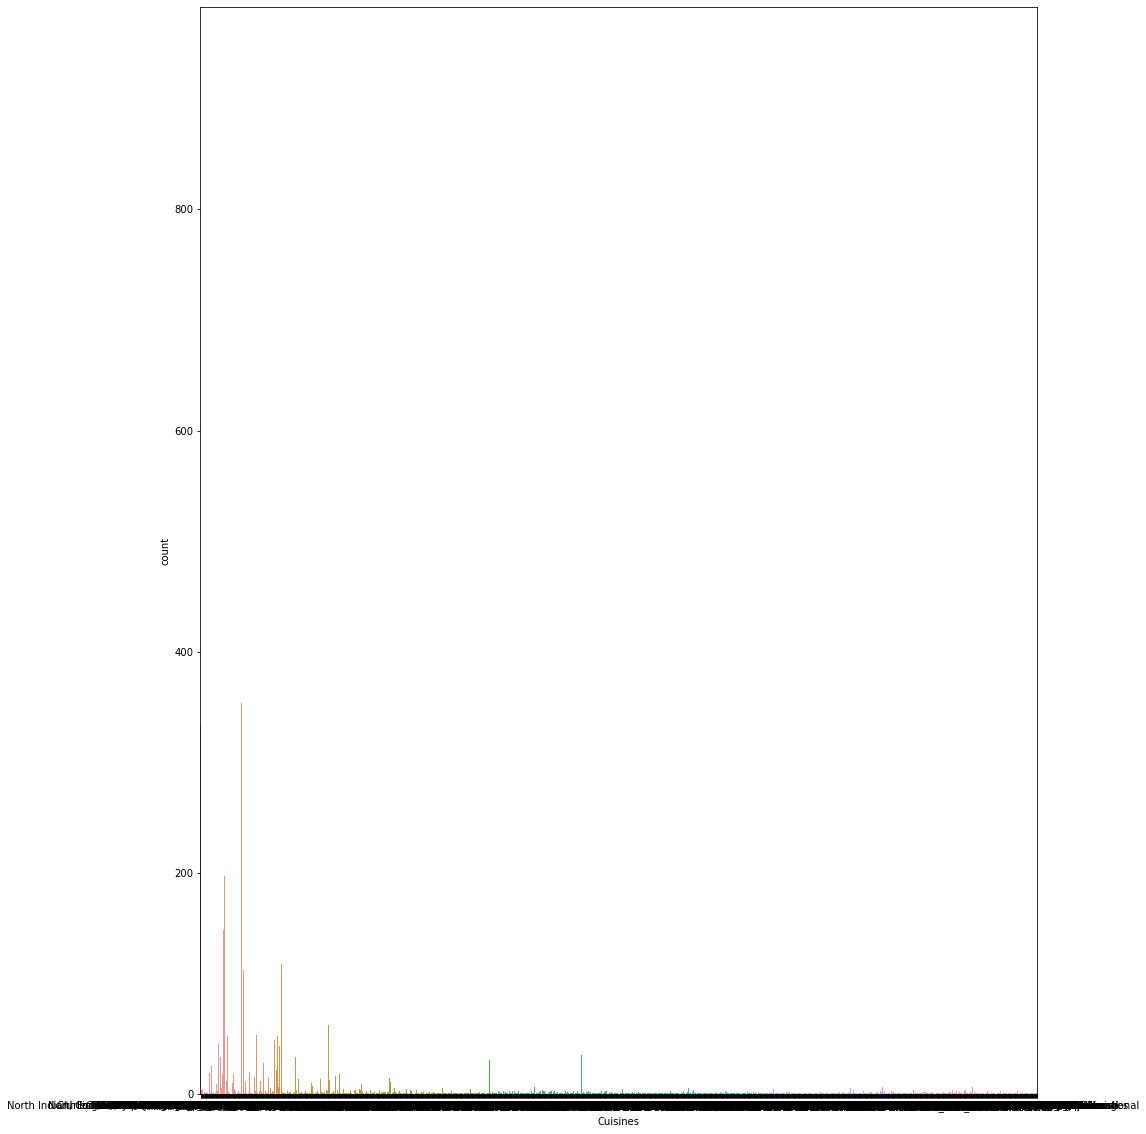

In [59]:
plt.figure(figsize=(15,20))
print(data_cat['Cuisines'].value_counts())
sns.countplot(data_cat['Cuisines'])
plt.show()

In [60]:
# we have more NorthIndian Cuisines in the Dataset.

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Rand(R)                     60
Emirati Diram(AED)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


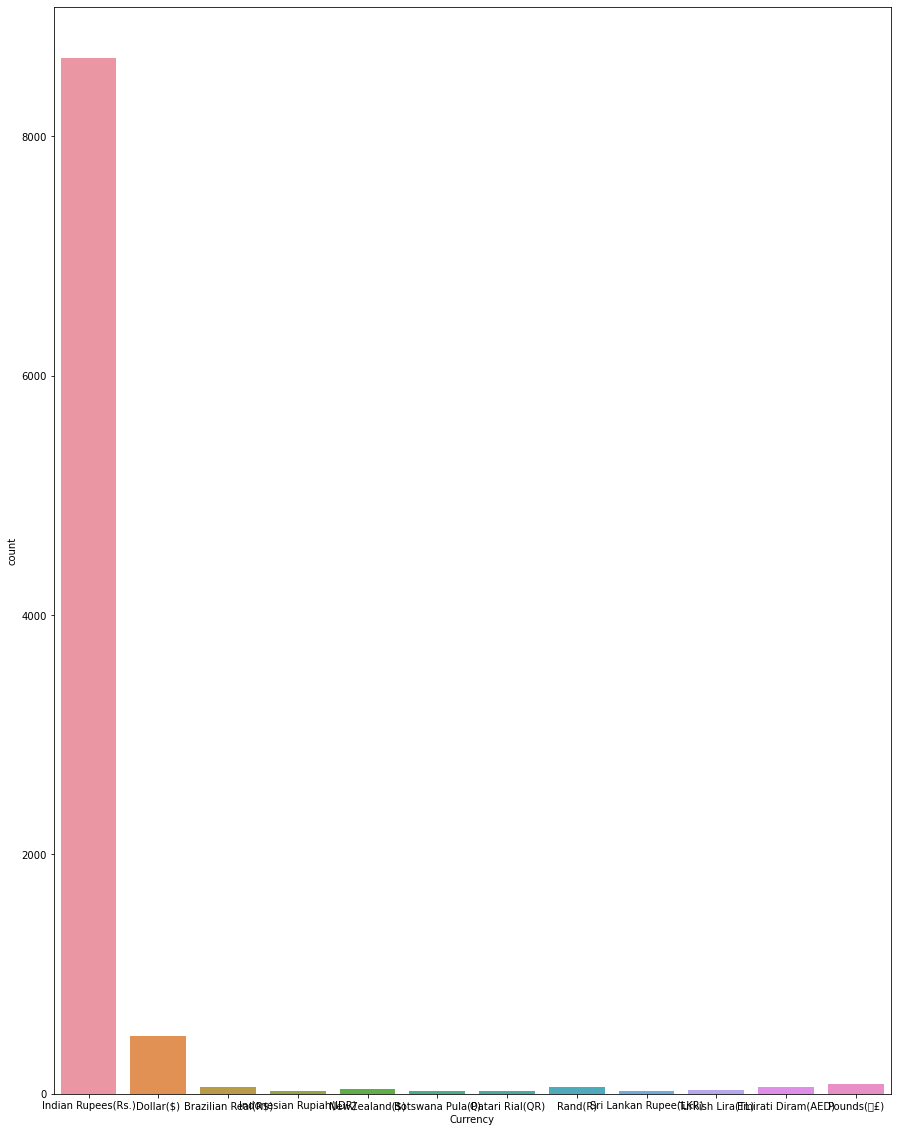

In [61]:
plt.figure(figsize=(15,20))
print(data_cat['Currency'].value_counts())
sns.countplot(data_cat['Currency'])
plt.show()

In [62]:
#we have more restaurants who accepts Indian Currency.
# we have Less restaurants who accepts srinlankan currency

In [63]:
data_cat.columns

Index(['Country', 'City', 'Locality', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Rating color', 'Rating text'],
      dtype='object')

No     8393
Yes    1158
Name: Has Table booking, dtype: int64


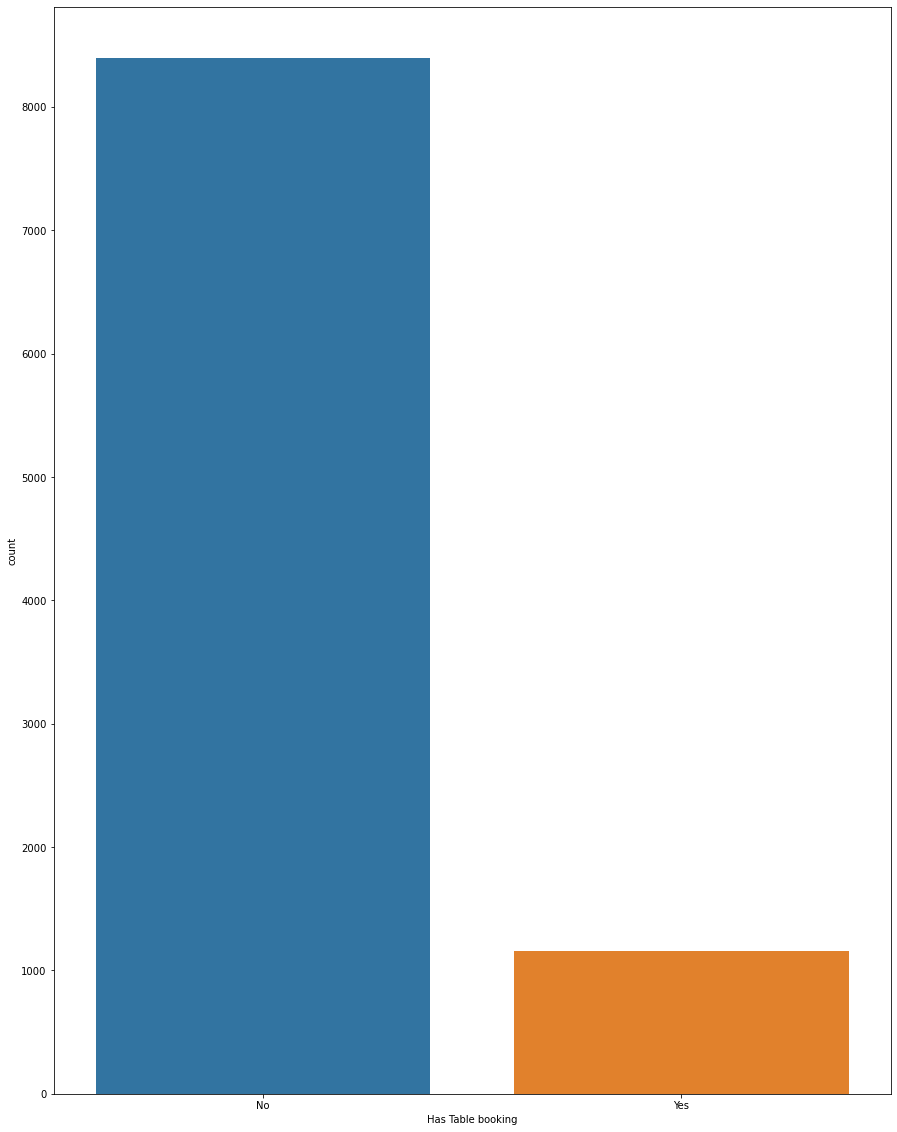

In [64]:
plt.figure(figsize=(15,20))
print(data_cat['Has Table booking'].value_counts())
sns.countplot(data_cat['Has Table booking'])
plt.show()

In [65]:
# we have more restaurant with Table booking No (8353).

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64


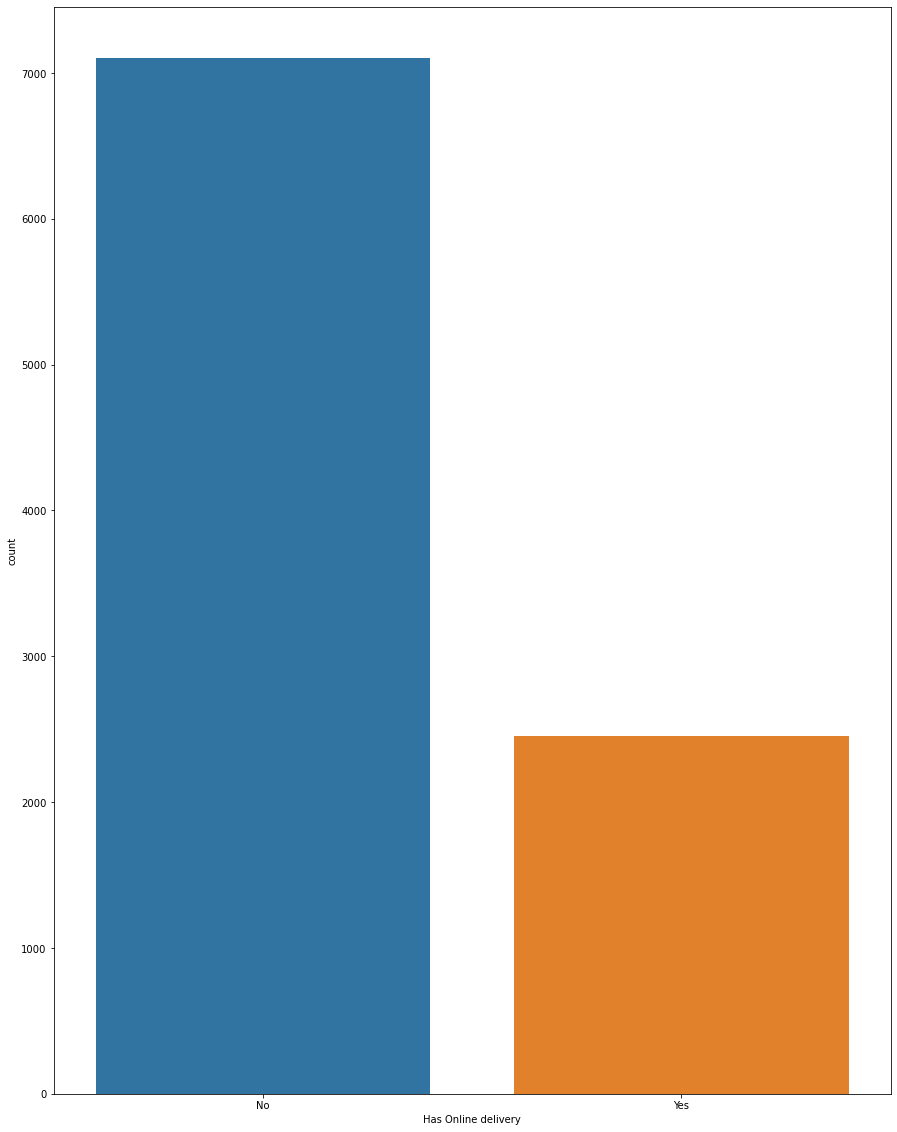

In [66]:
plt.figure(figsize=(15,20))
print(data_cat['Has Online delivery'].value_counts())
sns.countplot(data_cat['Has Online delivery'])
plt.show()

In [67]:
# we have more restaurants with online delivery No 

No     9517
Yes      34
Name: Is delivering now, dtype: int64


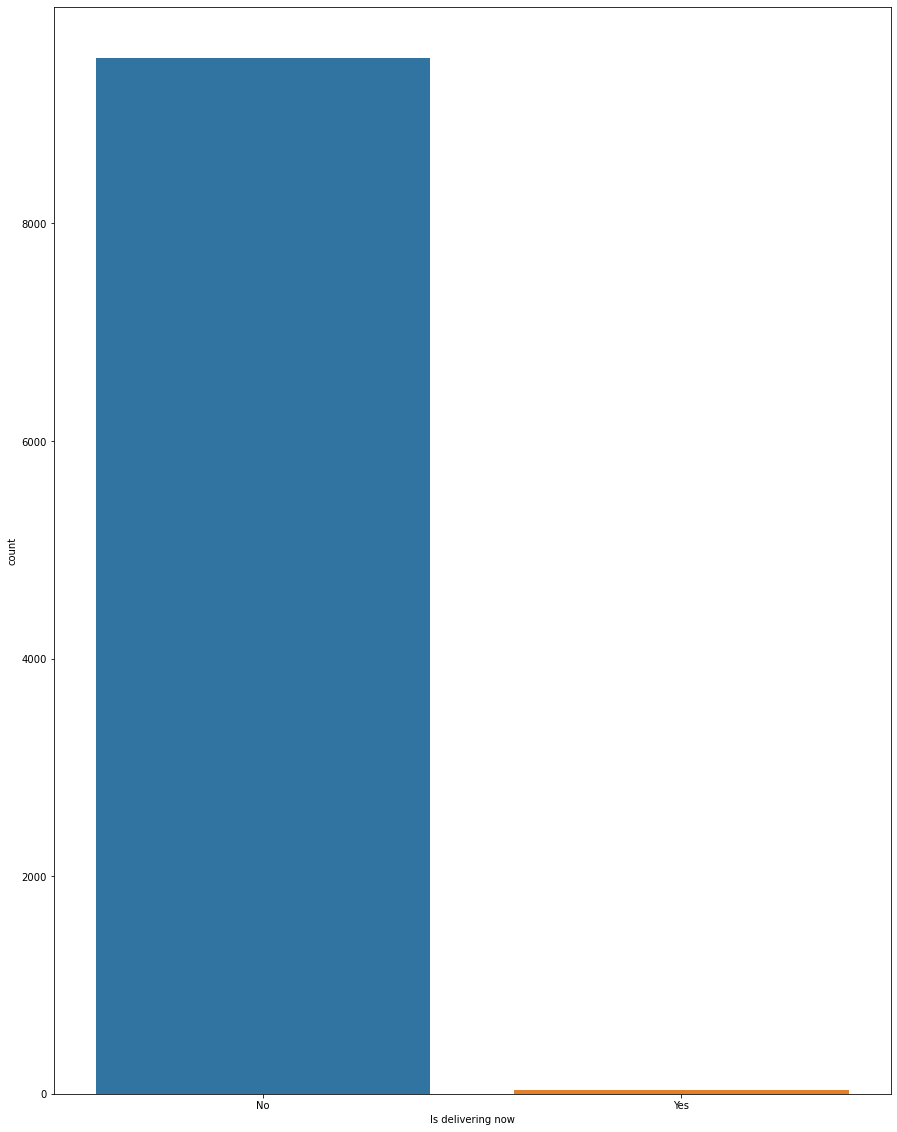

In [68]:
plt.figure(figsize=(15,20))
print(data_cat['Is delivering now'].value_counts())
sns.countplot(data_cat['Is delivering now'])
plt.show()

In [69]:
# almost (9517) restaurants have No for delivering Now

No    9551
Name: Switch to order menu, dtype: int64


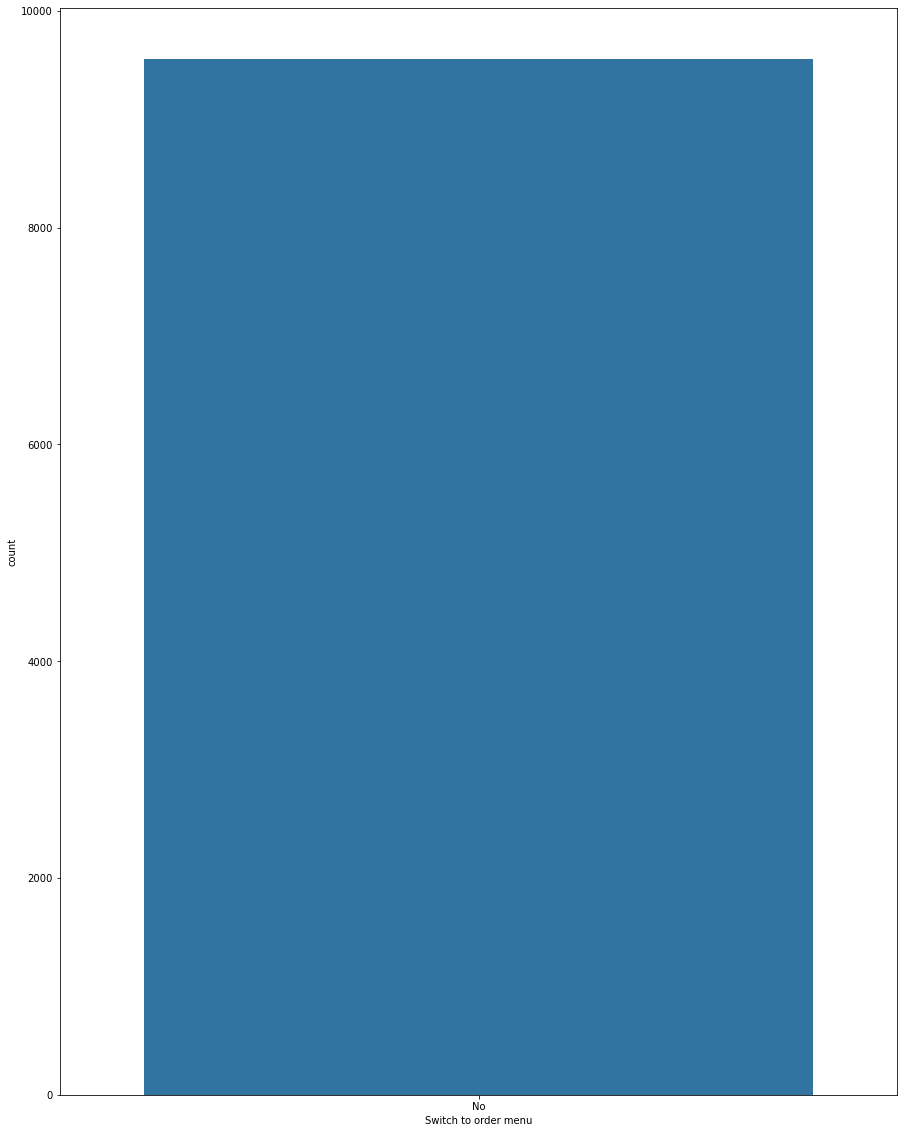

In [70]:
plt.figure(figsize=(15,20))
print(data_cat['Switch to order menu'].value_counts())
sns.countplot(data_cat['Switch to order menu'])
plt.show()

In [71]:
# since the column have only one unique values,deleting this column from the dataset.

In [72]:
data.drop(columns=['Switch to order menu'],axis=1,inplace=True)

In [73]:
data_cat.drop(columns=['Switch to order menu'],axis=1,inplace=True)

In [74]:
data_cat.columns

Index(['Country', 'City', 'Locality', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Rating color', 'Rating text'],
      dtype='object')

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64


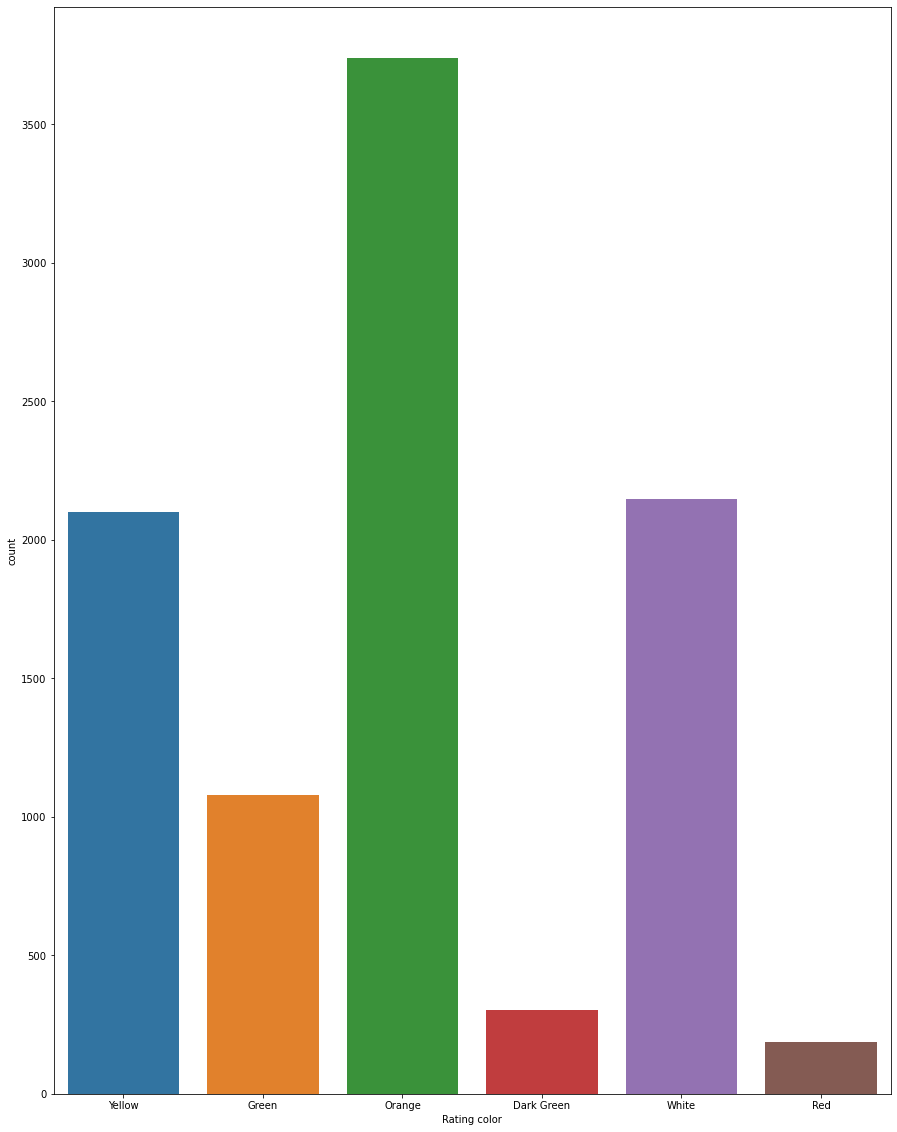

In [75]:
plt.figure(figsize=(15,20))
print(data_cat['Rating color'].value_counts())
sns.countplot(data_cat['Rating color'])
plt.show()

In [76]:
# we have orange colour rating at its highest.
# we have red colour rating at its lowest

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64


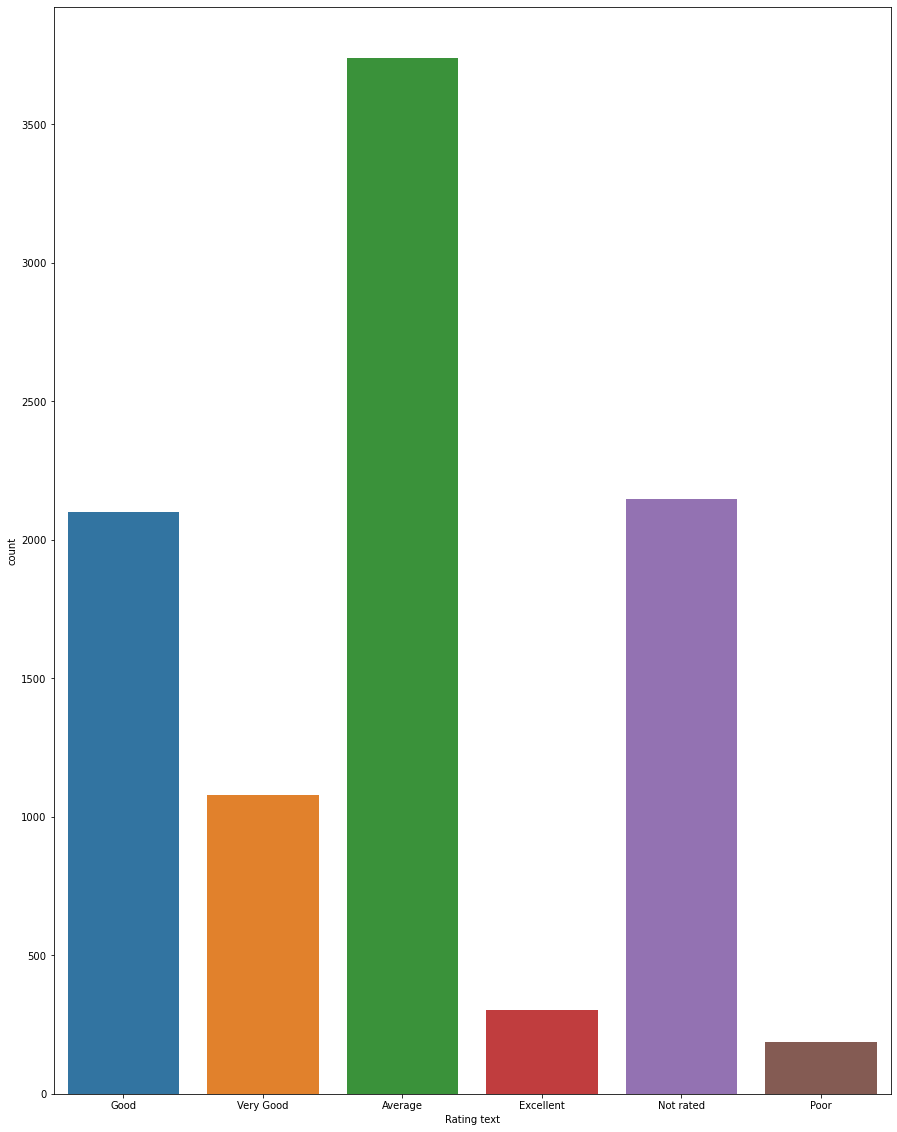

In [77]:
plt.figure(figsize=(15,20))
print(data_cat['Rating text'].value_counts())
sns.countplot(data_cat['Rating text'])
plt.show()

In [78]:
# we have more restaurants with Average as rating.
# we have 186 restaurants with Poor as rating.
# we have 301 restaurants with excellent as rating

# Bivariate Analysis

# comparision of 'Average Cost for two' with features

In [79]:
data_numerical.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [80]:
x=data_numerical.drop(columns=['Average Cost for two'],axis=1)
y=data_numerical['Average Cost for two']

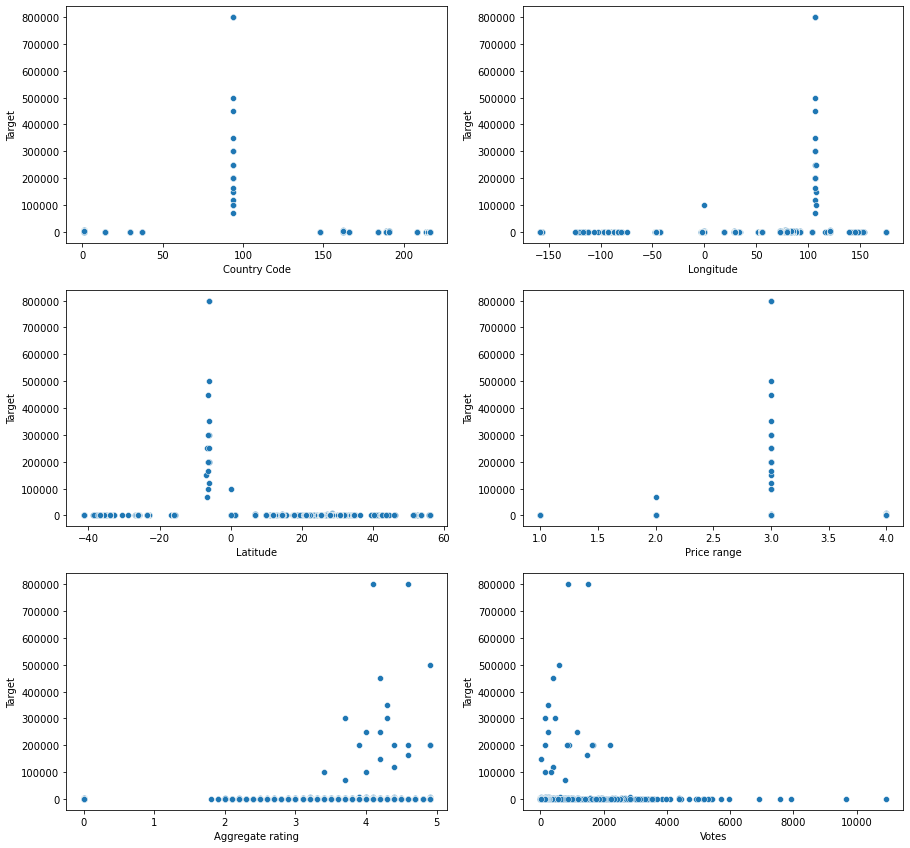

In [81]:
plt.figure(figsize=(15,20))
pltno=1
for columns in x:
    if pltno<=7:
        ax=plt.subplot(4,2,pltno)
        sns.scatterplot(x[columns],y)
        plt.xlabel(columns)
        plt.ylabel('Target')
    pltno+=1
plt.show()
    

In [82]:
#observations:
#at particular code,our target is increasing way
# at certain Longitude,we can see increasing data.
# at Price range3,we can see increase value in Target column.
# when the Aggregate rating is increasing,the Target values are also increasing.
# when the votes are at range 0 to3000 there is an increasing Target

In [83]:
data_cat.columns

Index(['Country', 'City', 'Locality', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Rating color', 'Rating text'],
      dtype='object')

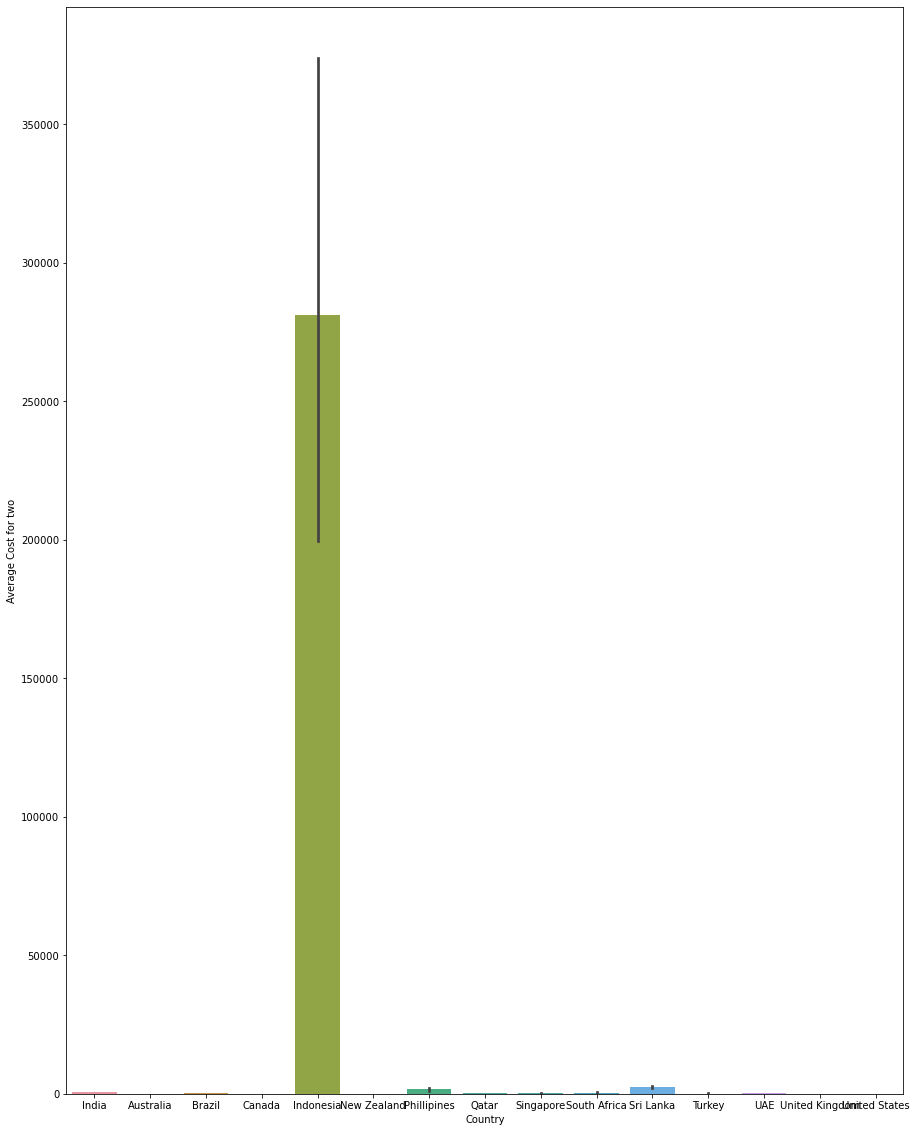

In [84]:
plt.figure(figsize=(15,20))
sns.barplot(x='Country',y='Average Cost for two',data=data)
plt.show()

In [85]:
# Indonesia Average price for Two is in highest range.

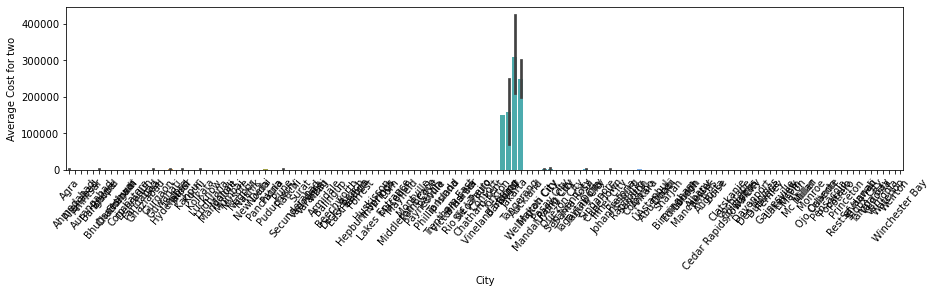

In [86]:
plt.figure(figsize=(15,3))
sns.barplot(x='City',y='Average Cost for two',data=data)
plt.xticks(rotation=50)
plt.show()

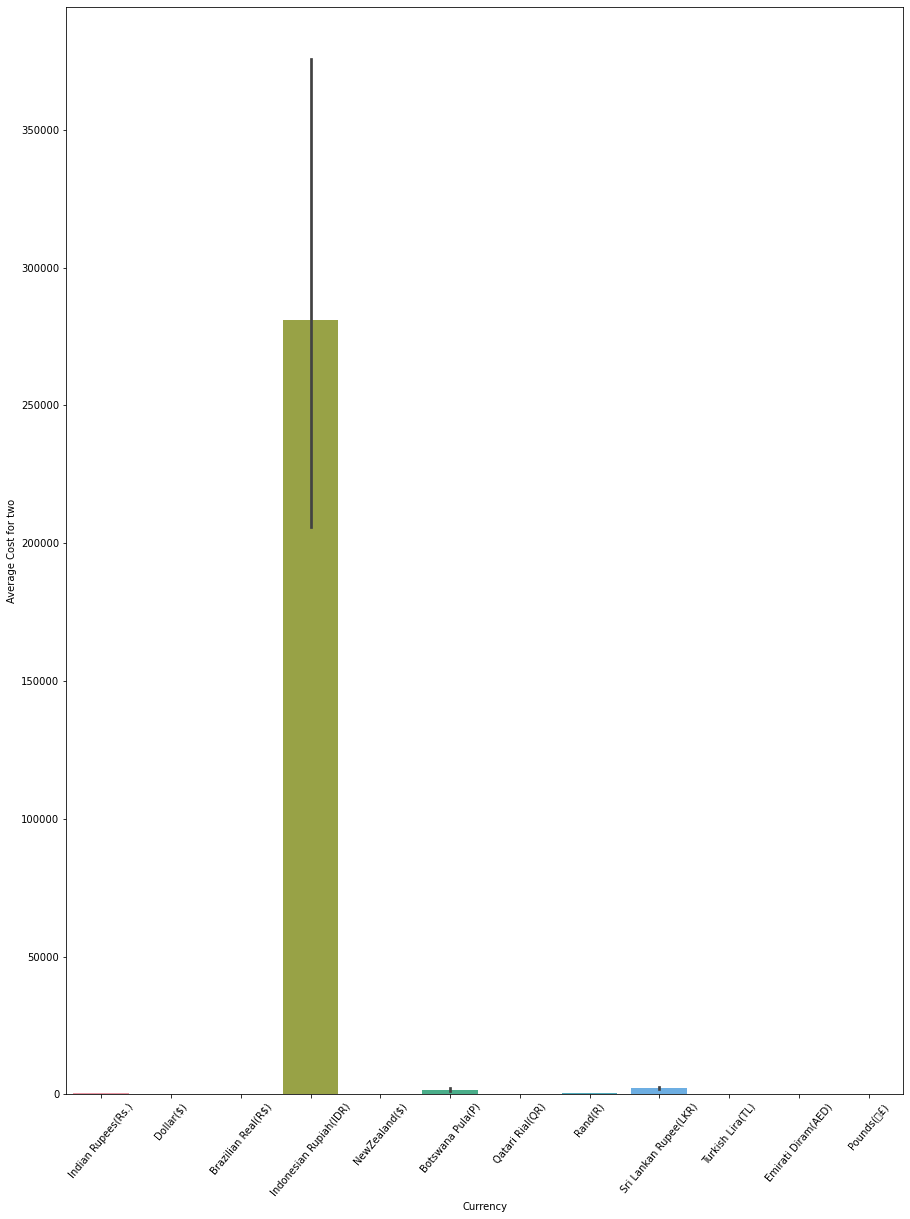

In [87]:
plt.figure(figsize=(15,20))
sns.barplot(x='Currency',y='Average Cost for two',data=data)
plt.xticks(rotation=50)
plt.show()

In [88]:
#Indonesian IDR is having high range for Average cost of Two.

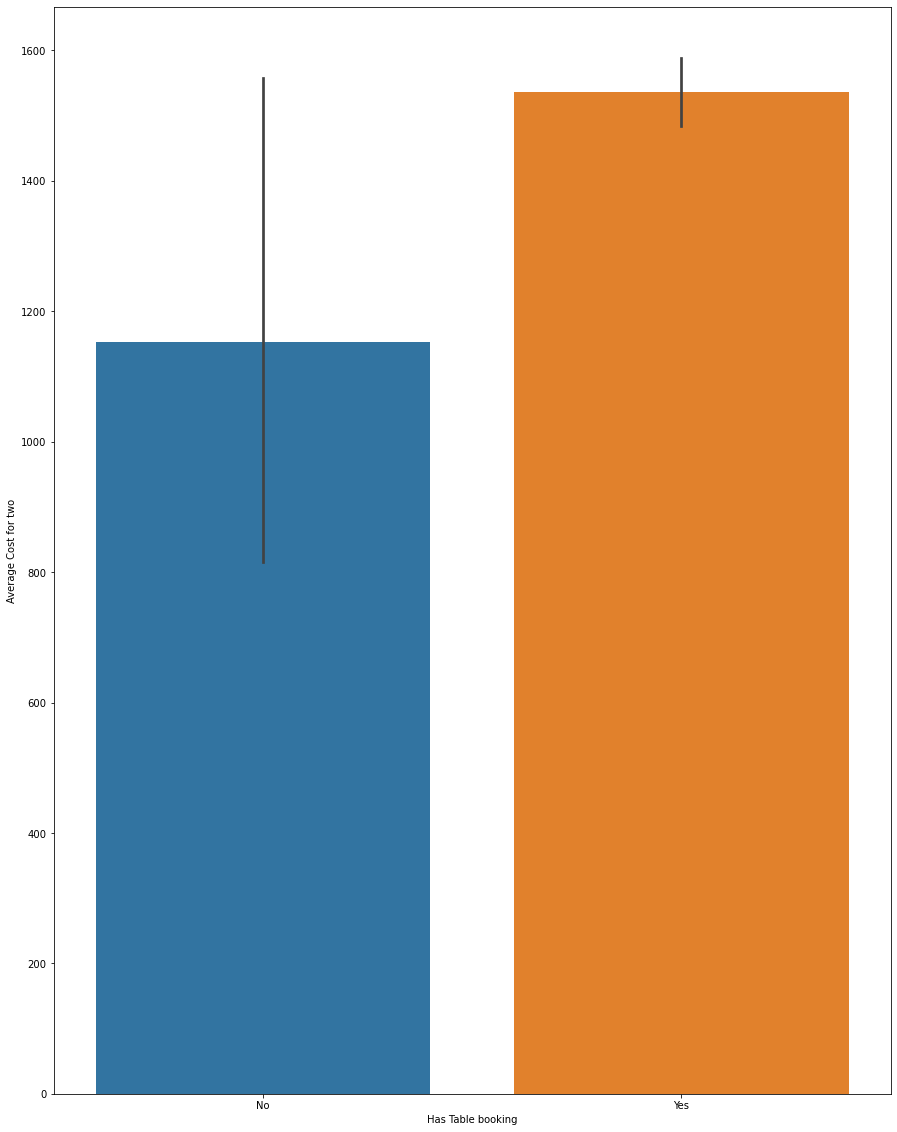

In [89]:
plt.figure(figsize=(15,20))
sns.barplot(x='Has Table booking',y='Average Cost for two',data=data)
plt.show()

In [90]:
# Those restaurants with Yes Table booking,have got Averge price for two on high range.

In [91]:
data_cat.columns

Index(['Country', 'City', 'Locality', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Rating color', 'Rating text'],
      dtype='object')

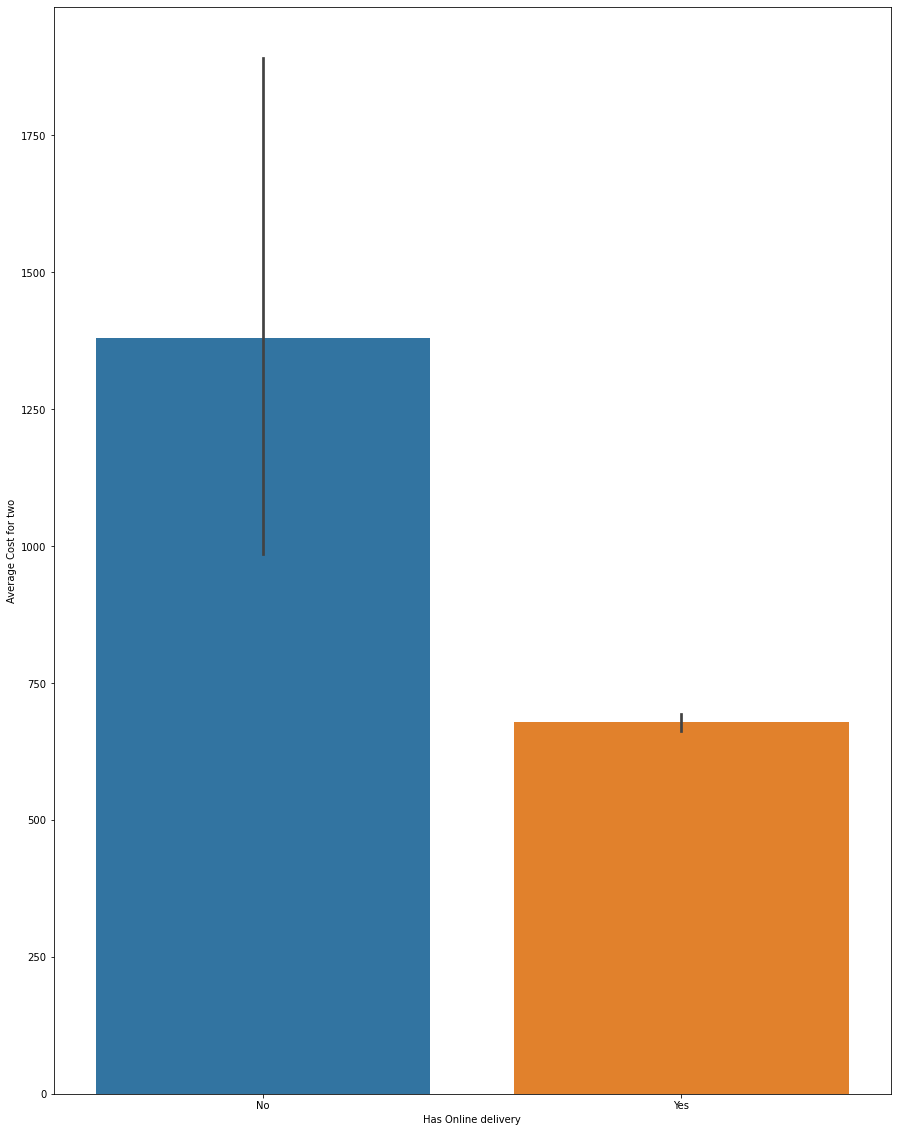

In [92]:
plt.figure(figsize=(15,20))
sns.barplot(x='Has Online delivery',y='Average Cost for two',data=data)
plt.show()

In [93]:
# Those restaurants with No for Online Delivery have got more Average cost for Two.

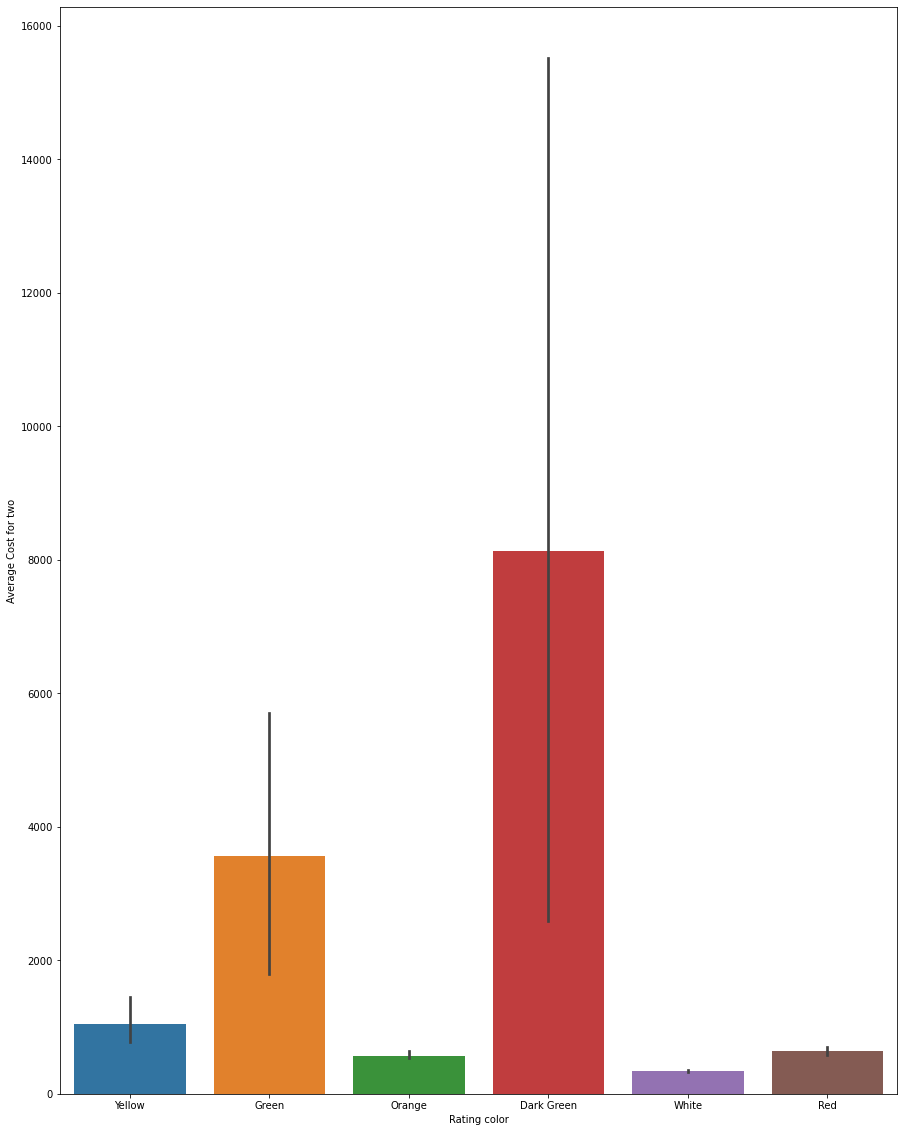

In [94]:
plt.figure(figsize=(15,20))
sns.barplot(x='Rating color',y='Average Cost for two',data=data)
plt.show()

In [95]:
# Those restaurants with DarkGreen colour range has got more for Average cost per Two

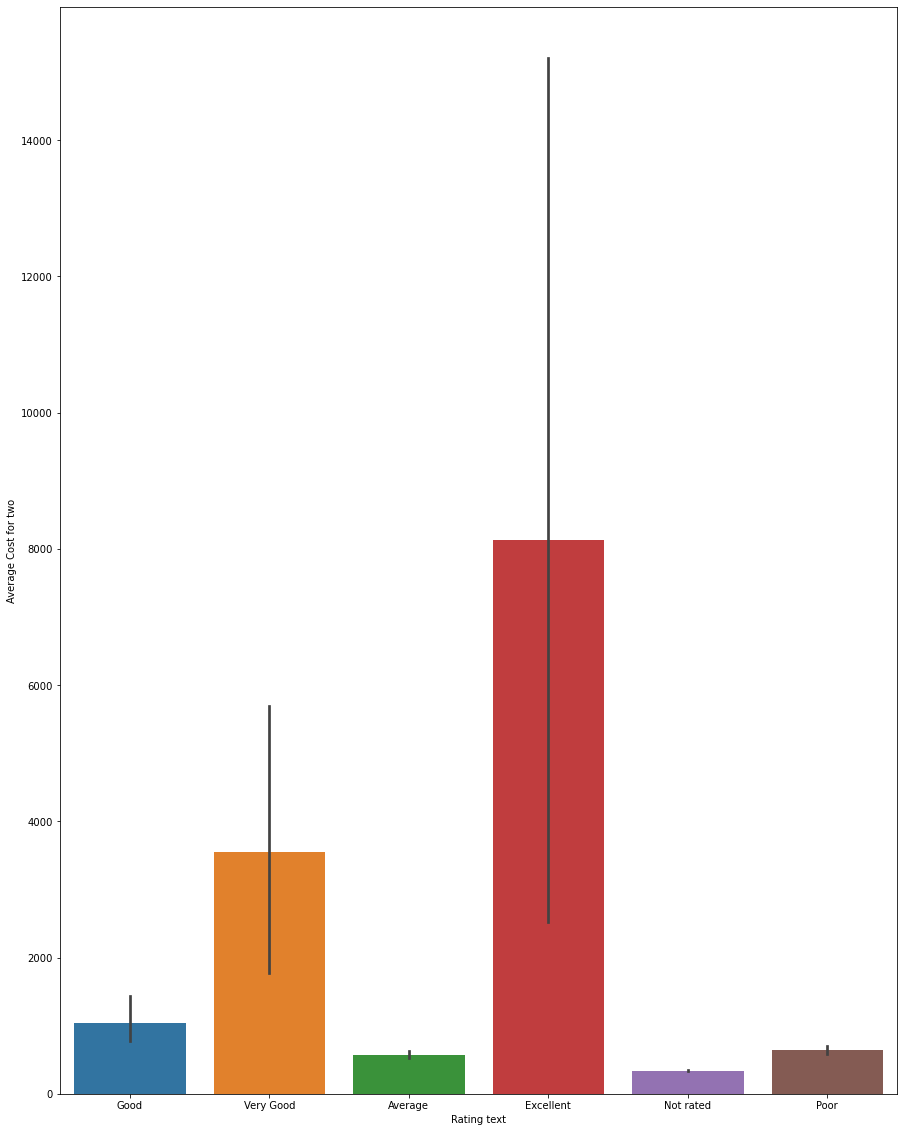

In [96]:
plt.figure(figsize=(15,20))
sns.barplot(x='Rating text',y='Average Cost for two',data=data)
plt.show()

In [97]:
#Those Restaurants with Rating Text Excellent have got more for Average cost for two.

# Comparision of Price Range with other features

In [98]:
x1=data_numerical.drop(columns=['Price range'],axis=1)
y1=data_numerical['Price range']

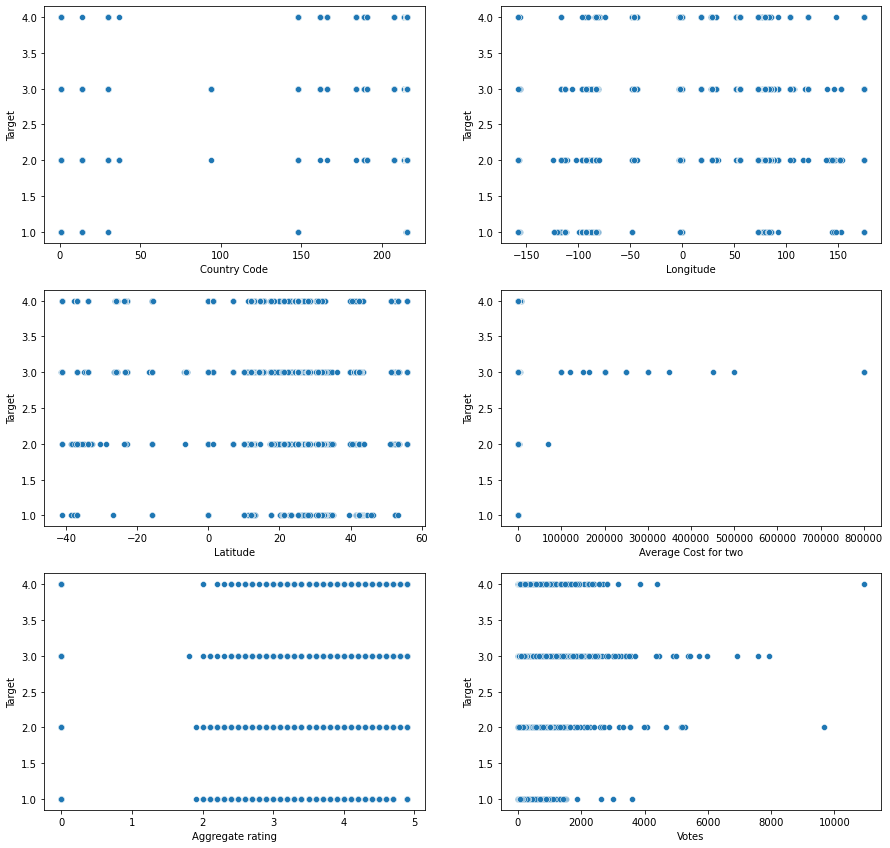

In [99]:
plt.figure(figsize=(15,20))
pltno=1
for columns in x1:
    if pltno<=7:
        ax=plt.subplot(4,2,pltno)
        sns.scatterplot(x1[columns],y1)
        plt.xlabel(columns)
        plt.ylabel('Target')
    pltno+=1
plt.show()

In [100]:
#observations:
#The price range varies from 1 to 4,it is a classification problem
# With the Country Code,The Data is scattered.
# with the Average cost of two,the price range also increases.
# when the Aggregate rating increases,the Target value also increases.
# if the votes increases,the price range also increases


In [101]:
data['Price range'].value_counts() # we have only 4 values,it is a classification pblm

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [102]:
data_cat.columns

Index(['Country', 'City', 'Locality', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Rating color', 'Rating text'],
      dtype='object')

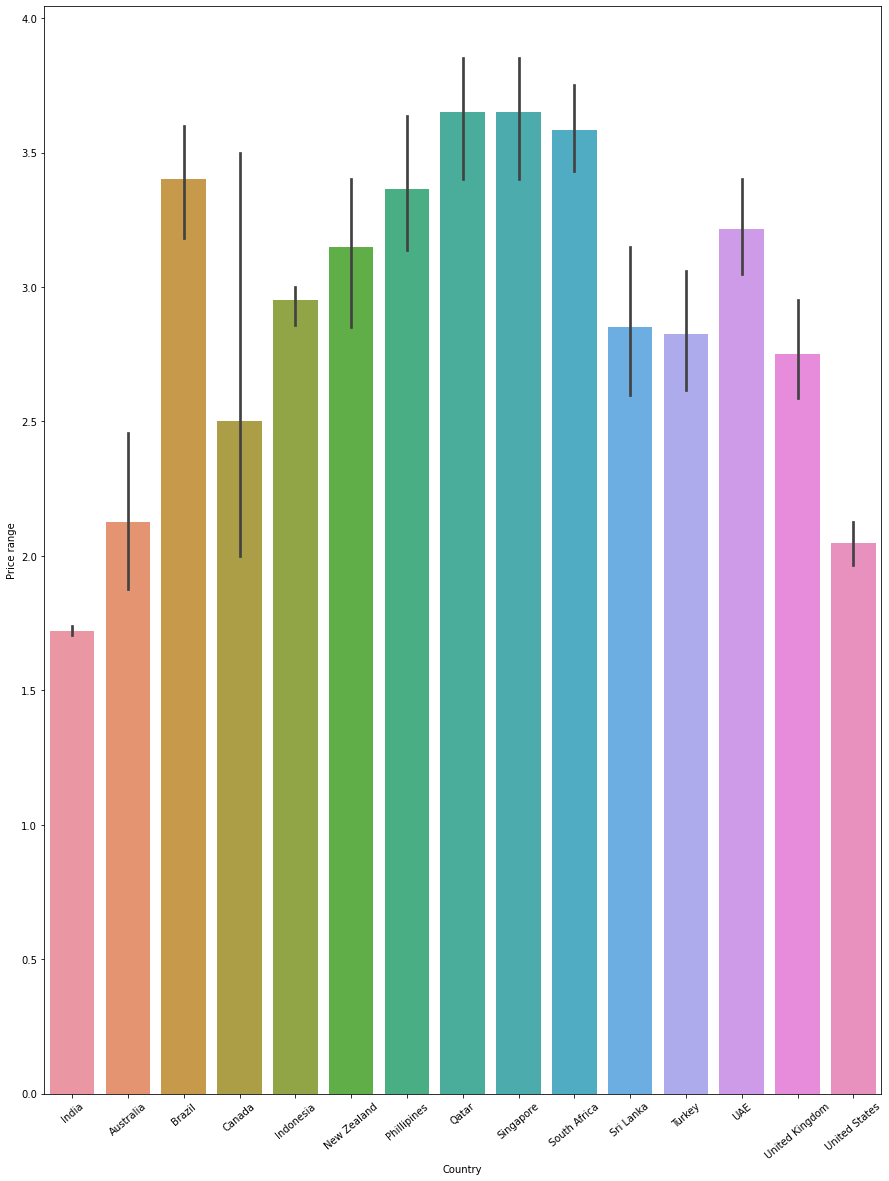

In [103]:
plt.figure(figsize=(15,20))
sns.barplot(x='Country',y='Price range',data=data)
plt.xticks(rotation=40)
plt.show()

In [104]:
# qatar and singapore restaurants are having high for Price range.

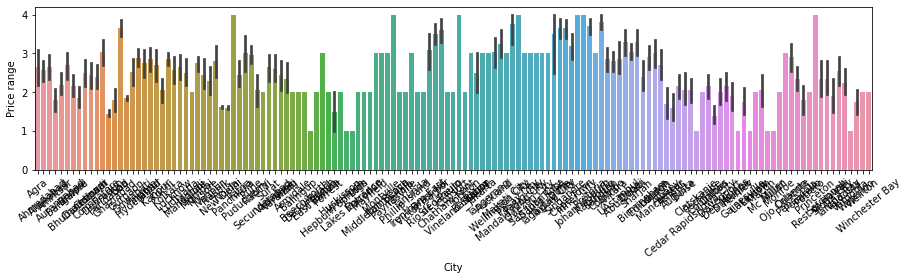

In [105]:
plt.figure(figsize=(15,3))
sns.barplot(x='City',y='Price range',data=data)
plt.xticks(rotation=40)
plt.show()

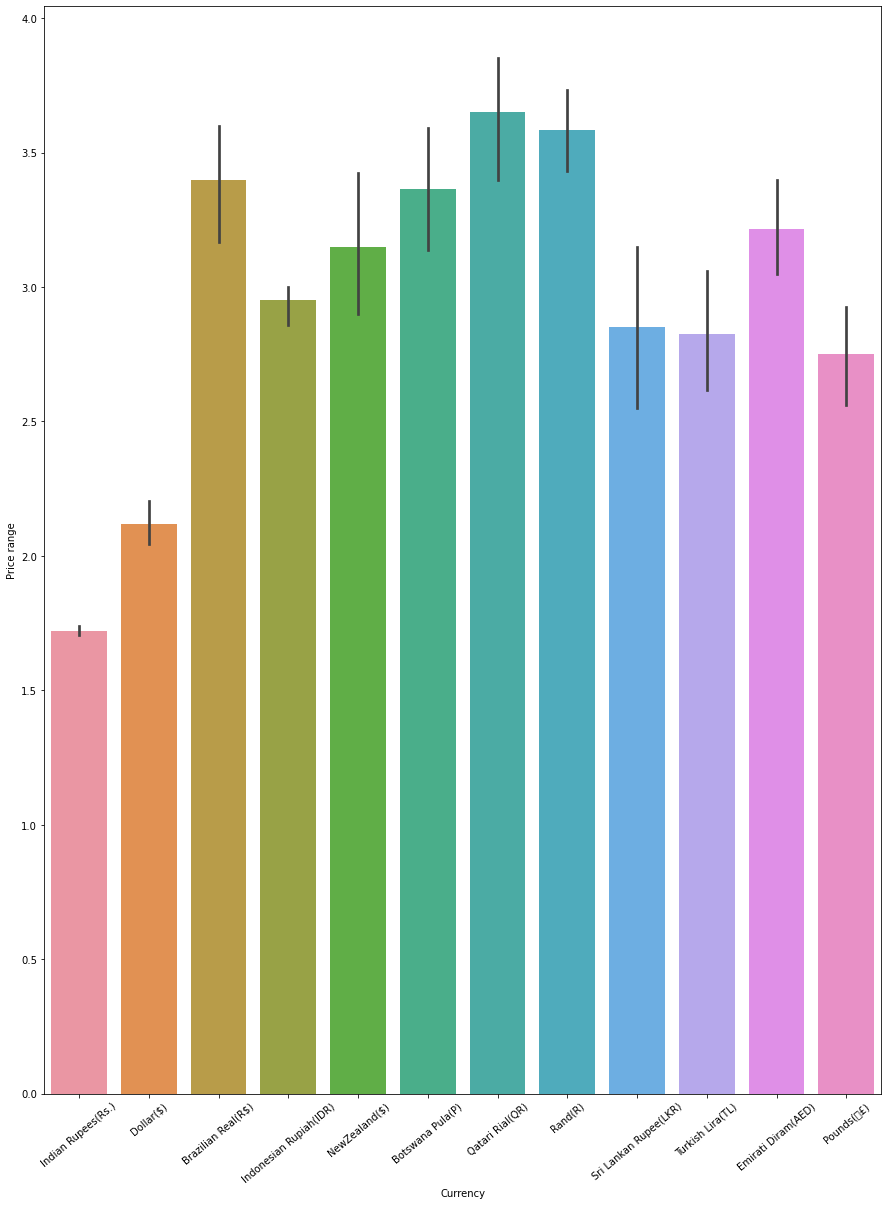

In [106]:
plt.figure(figsize=(15,20))
sns.barplot(x='Currency',y='Price range',data=data)
plt.xticks(rotation=40)
plt.show()

In [107]:
# qatari riyals have highest price range for restaurants.

In [108]:
data_cat.columns

Index(['Country', 'City', 'Locality', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Rating color', 'Rating text'],
      dtype='object')

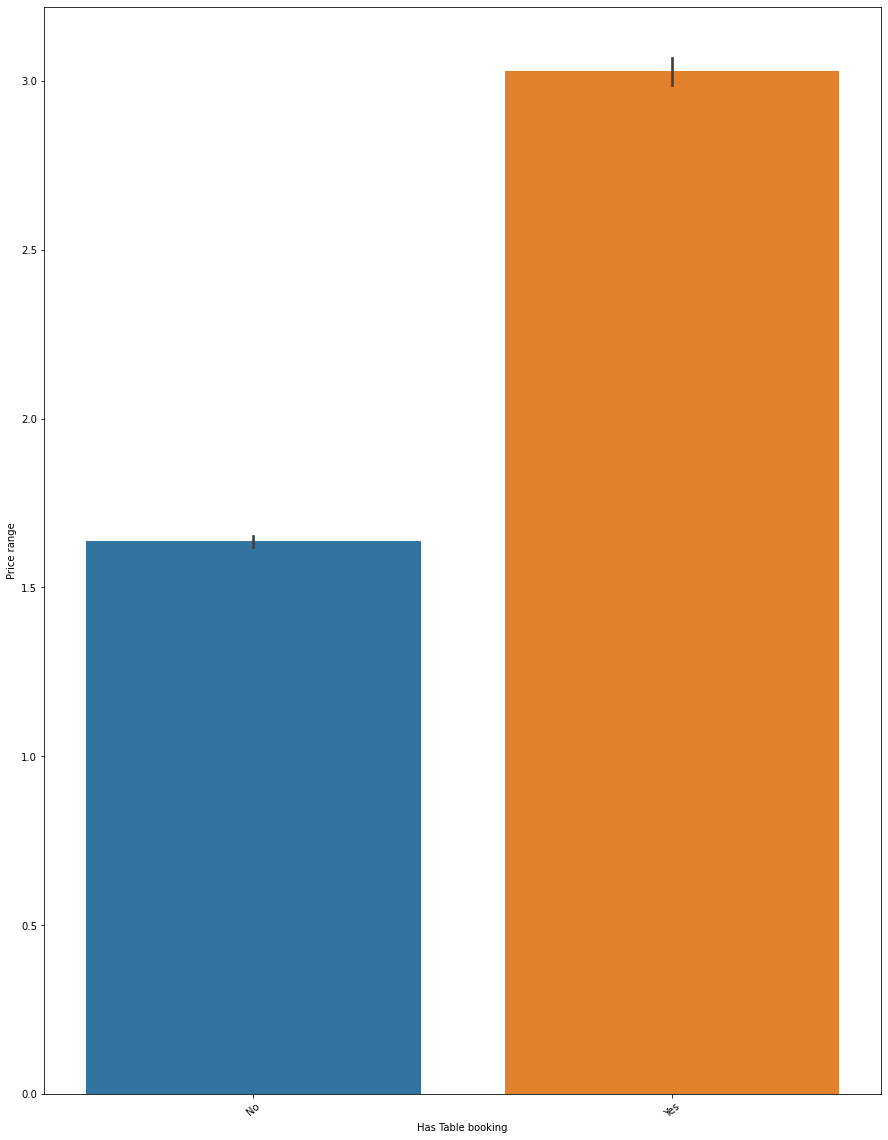

In [109]:
plt.figure(figsize=(15,20))
sns.barplot(x='Has Table booking',y='Price range',data=data)
plt.xticks(rotation=40)
plt.show()

In [110]:
# The Restaurants with Yes for Table Booking have the highest Price range.

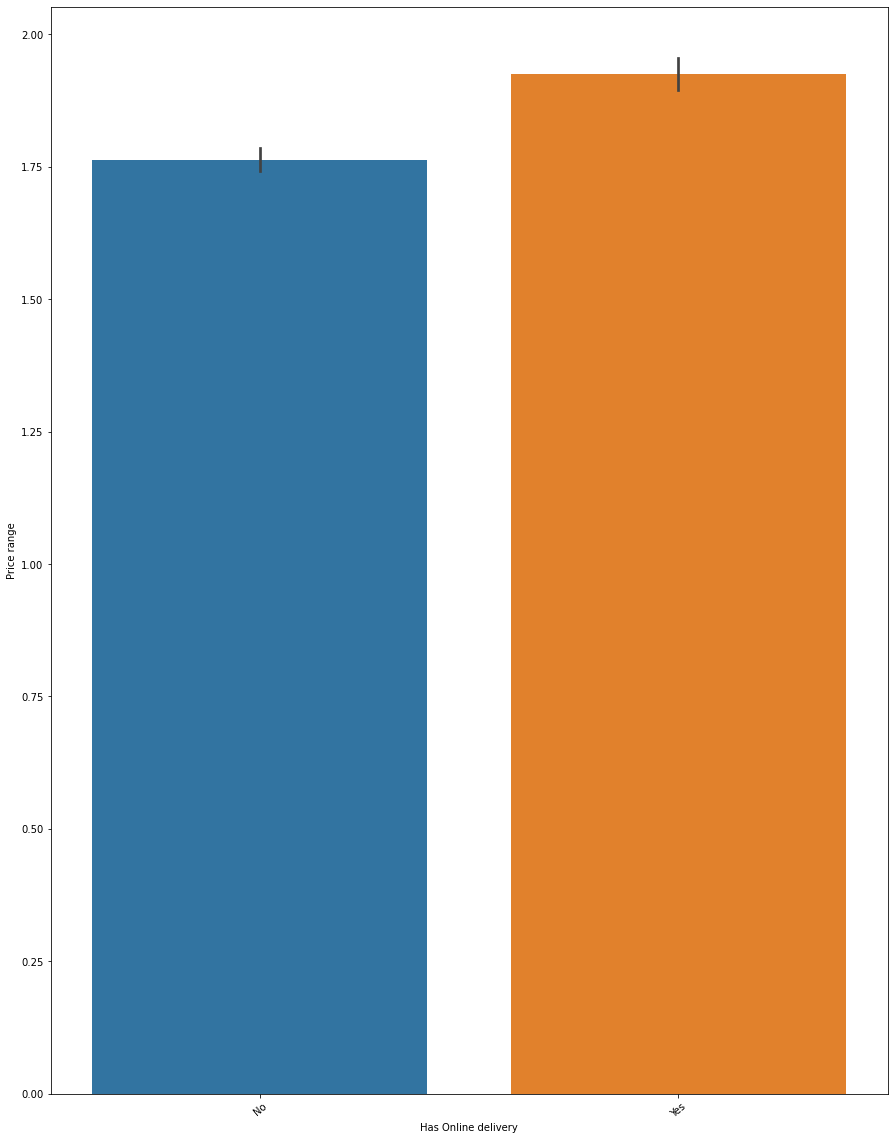

In [111]:
plt.figure(figsize=(15,20))
sns.barplot(x='Has Online delivery',y='Price range',data=data)
plt.xticks(rotation=40)
plt.show()

In [112]:
# The Restaurants with yes for Online delivery has price range high.

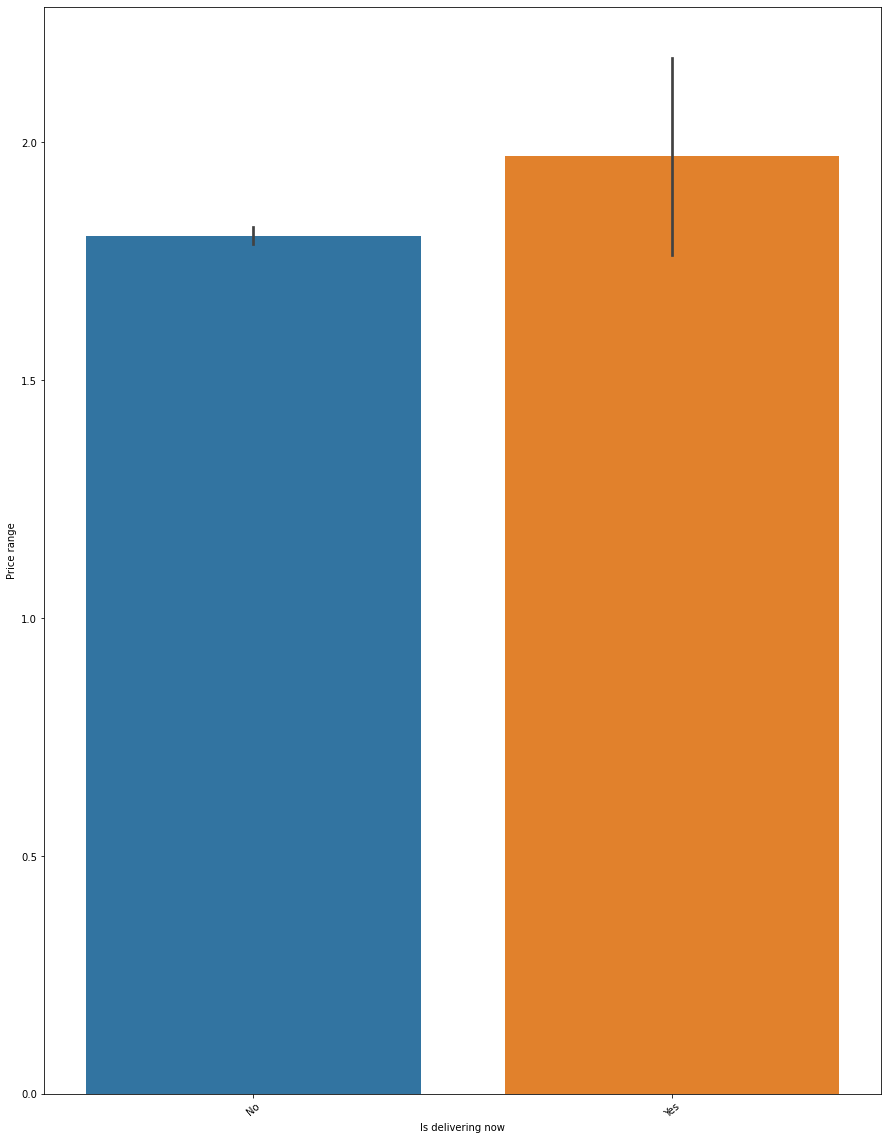

In [113]:
plt.figure(figsize=(15,20))
sns.barplot(x='Is delivering now',y='Price range',data=data)
plt.xticks(rotation=40)
plt.show()

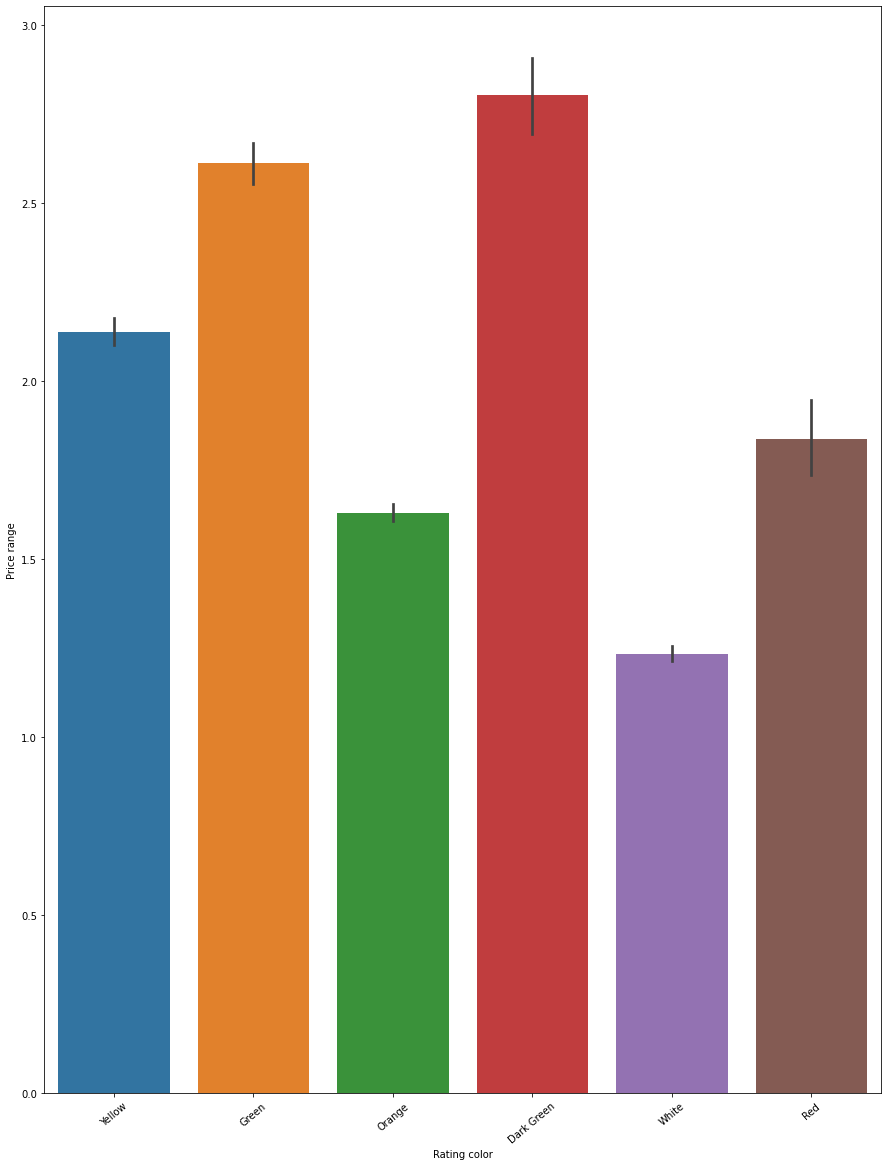

In [114]:
plt.figure(figsize=(15,20))
sns.barplot(x='Rating color',y='Price range',data=data)
plt.xticks(rotation=40)
plt.show()

In [115]:
# Rating color Dark Green has the highest Price range values.

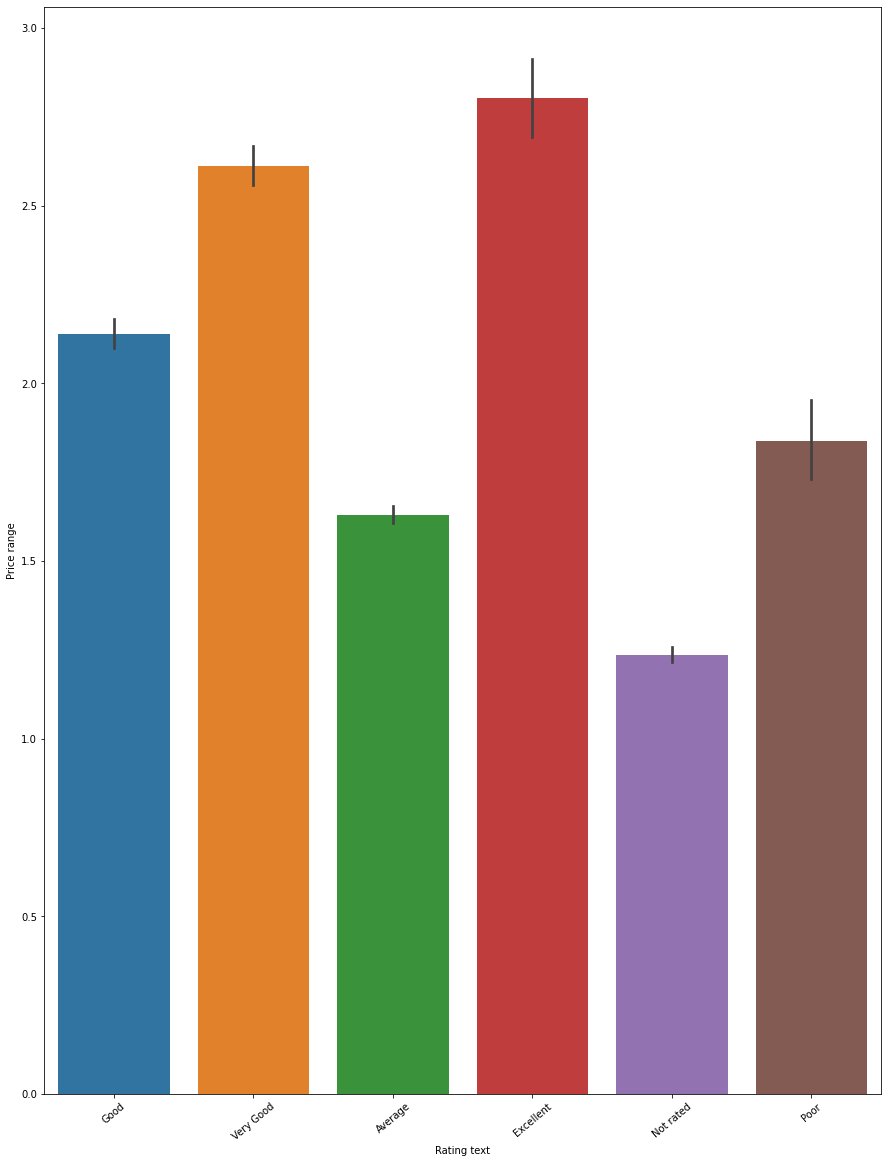

In [116]:
plt.figure(figsize=(15,20))
sns.barplot(x='Rating text',y='Price range',data=data)
plt.xticks(rotation=40)
plt.show()

In [117]:
# the rating text excellent is having high price range also.

# Multivariate Analysis

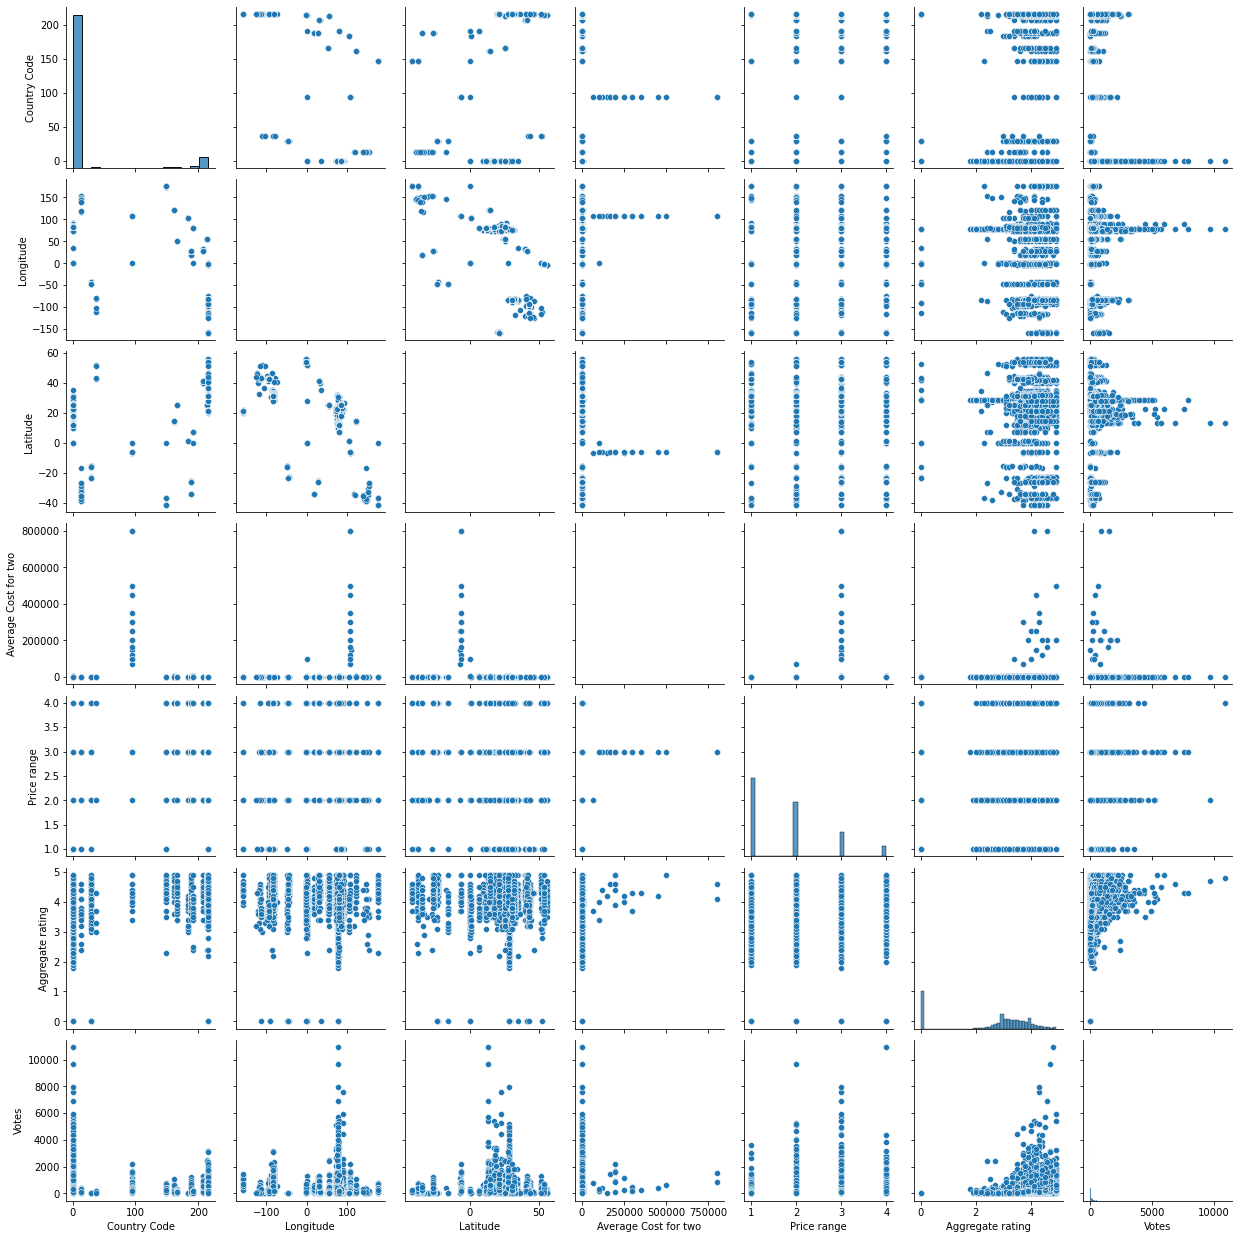

In [118]:
sns.pairplot(data)

# Encoding categorical columns

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
le=LabelEncoder()

In [121]:
data_cat.columns

Index(['Country', 'City', 'Locality', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Rating color', 'Rating text'],
      dtype='object')

In [122]:
for i in data_cat.columns:
    data_cat[i]=le.fit_transform(data_cat[i])
    

In [123]:
data_cat

,Country,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text
0,3,1,17,1514,4,0,0,0,5,2
1,3,1,17,1514,4,0,0,0,5,2
2,3,1,17,1306,4,0,0,0,5,2
3,3,1,204,1645,4,0,0,0,1,5
4,3,1,204,1373,4,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...
9546,14,135,1174,18,2,0,0,0,5,2
9547,14,135,1174,1795,2,0,0,0,5,2
9548,14,135,1174,1125,2,0,0,0,5,2
9549,14,136,1176,317,2,0,0,0,5,2


In [124]:
# Removing these columns from Original Data
data.drop(columns=['Country', 'City', 'Locality', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Rating color', 'Rating text'],axis=1,inplace=True)

In [125]:
data1=pd.concat([data,data_cat],axis=1)
data1

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Country,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text
0,1,78.011544,27.161661,850,3,3.9,140,3,1,17,1514,4,0,0,0,5,2
1,1,0.000000,0.000000,700,2,3.5,71,3,1,17,1514,4,0,0,0,5,2
2,1,78.011608,27.160832,500,2,3.6,94,3,1,17,1306,4,0,0,0,5,2
3,1,77.998092,27.195928,400,2,4.0,87,3,1,204,1645,4,0,0,0,1,5
4,1,78.007553,27.201725,1000,3,4.2,177,3,1,204,1373,4,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,-92.335523,42.498400,10,1,3.7,101,14,135,1174,18,2,0,0,0,5,2
9547,216,-92.335769,42.497919,10,1,3.5,58,14,135,1174,1795,2,0,0,0,5,2
9548,216,-92.323400,42.465580,25,2,3.9,156,14,135,1174,1125,2,0,0,0,5,2
9549,216,-80.529488,40.396043,25,2,3.9,156,14,136,1176,317,2,0,0,0,5,2


In [126]:
#After removing the columns,now we have 9551 rows and columns.

# Corelation

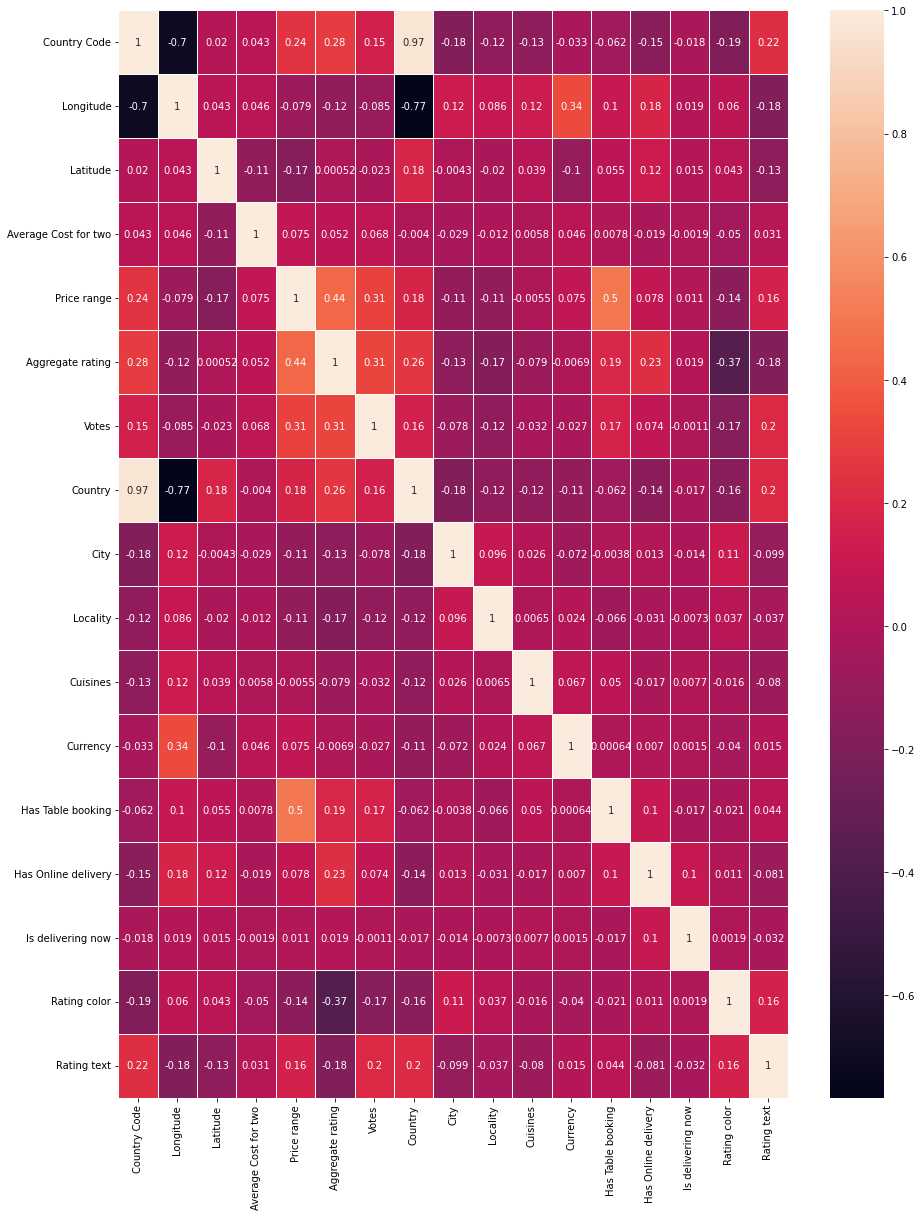

In [127]:
corr=data1.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr,annot=True,linewidths=0.5)
plt.show()

In [128]:
# seeing corelation for Target Variable Average Cost for Two:
corr['Average Cost for two'].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.075083
Votes                   0.067783
Aggregate rating        0.051792
Longitude               0.045891
Currency                0.045615
Country Code            0.043225
Rating text             0.031439
Has Table booking       0.007758
Cuisines                0.005755
Is delivering now      -0.001862
Country                -0.004034
Locality               -0.012136
Has Online delivery    -0.018974
City                   -0.028838
Rating color           -0.049970
Latitude               -0.111088
Name: Average Cost for two, dtype: float64

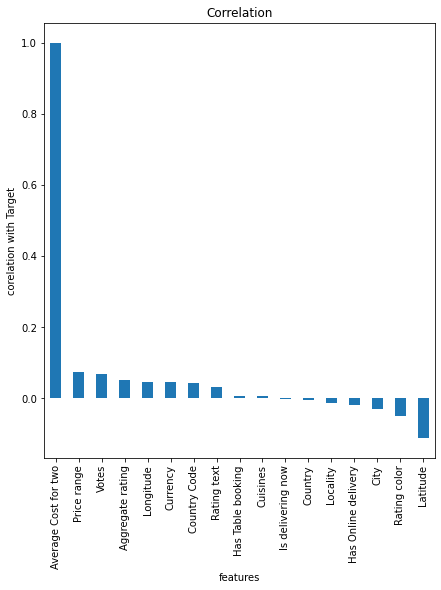

In [129]:
plt.figure(figsize=(7,8))
corr['Average Cost for two'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('corelation with Target')
plt.title('Correlation')
plt.show()

In [130]:
# Seeing the Corelation for Target Value 'Price range'
corr['Price range'].sort_values(ascending=False)

Price range             1.000000
Has Table booking       0.501925
Aggregate rating        0.437944
Votes                   0.309444
Country Code            0.243327
Country                 0.178035
Rating text             0.164242
Has Online delivery     0.077918
Currency                0.075179
Average Cost for two    0.075083
Is delivering now       0.010940
Cuisines               -0.005489
Longitude              -0.078939
City                   -0.105759
Locality               -0.114459
Rating color           -0.140468
Latitude               -0.166688
Name: Price range, dtype: float64

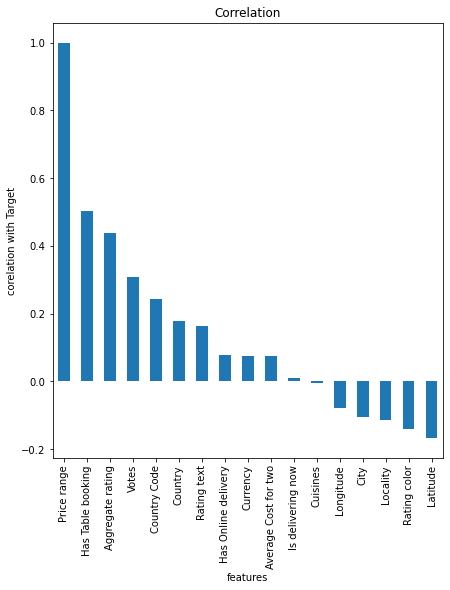

In [131]:
plt.figure(figsize=(7,8))
corr['Price range'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('corelation with Target')
plt.title('Correlation')
plt.show()

# Selecting best Features using Kbest method.

In [132]:
# To Select the Best Features Using SelectK Best Method.
from sklearn.feature_selection import SelectKBest, f_classif

In [133]:
x=data1.drop(columns=['Average Cost for two'],axis=1)
y=data1['Average Cost for two']

In [134]:
best_feature=SelectKBest(score_func=f_classif,k='all')
fit=best_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)                        # best_score for Average cost for two.
best_score=pd.concat([score,columns],axis=1)
best_score.columns=['score','columnname']
best_score

,score,columnname
0,257.630181,Country Code
1,134.062816,Longitude
2,15.831991,Latitude
3,399.678183,Price range
4,21.799627,Aggregate rating
5,14.040446,Votes
6,286.736768,Country
7,4.549936,City
8,3.320822,Locality
9,3.651512,Cuisines


In [135]:
best_score.sort_values('score',ascending=False)

,score,columnname
3,399.678183,Price range
6,286.736768,Country
0,257.630181,Country Code
1,134.062816,Longitude
11,70.831302,Has Table booking
10,27.227608,Currency
4,21.799627,Aggregate rating
2,15.831991,Latitude
5,14.040446,Votes
12,10.853055,Has Online delivery


In [136]:
# Selecting Best Features for Price range Target
x1=data1.drop(columns=['Price range'],axis=1)
y1=data1['Price range']

In [137]:
best_feature=SelectKBest(score_func=f_classif,k='all')
fit=best_feature.fit(x1,y1)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x1.columns)                        # best_score for Price range
best_score1=pd.concat([score,columns],axis=1)
best_score1.columns=['score','columnname']
best_score1

,score,columnname
0,211.626522,Country Code
1,20.438495,Longitude
2,135.390345,Latitude
3,35.592812,Average Cost for two
4,807.034563,Aggregate rating
5,402.738731,Votes
6,109.570337,Country
7,50.204078,City
8,69.367159,Locality
9,1.110207,Cuisines


In [138]:
best_score1.sort_values('score',ascending=False)

,score,columnname
11,1334.321846,Has Table booking
4,807.034563,Aggregate rating
5,402.738731,Votes
12,259.996134,Has Online delivery
0,211.626522,Country Code
15,136.495966,Rating text
2,135.390345,Latitude
6,109.570337,Country
8,69.367159,Locality
14,64.379889,Rating color


In [139]:
# Not dropping any columns,as each column is related for both target variables.

# Outliers Detection and Removal

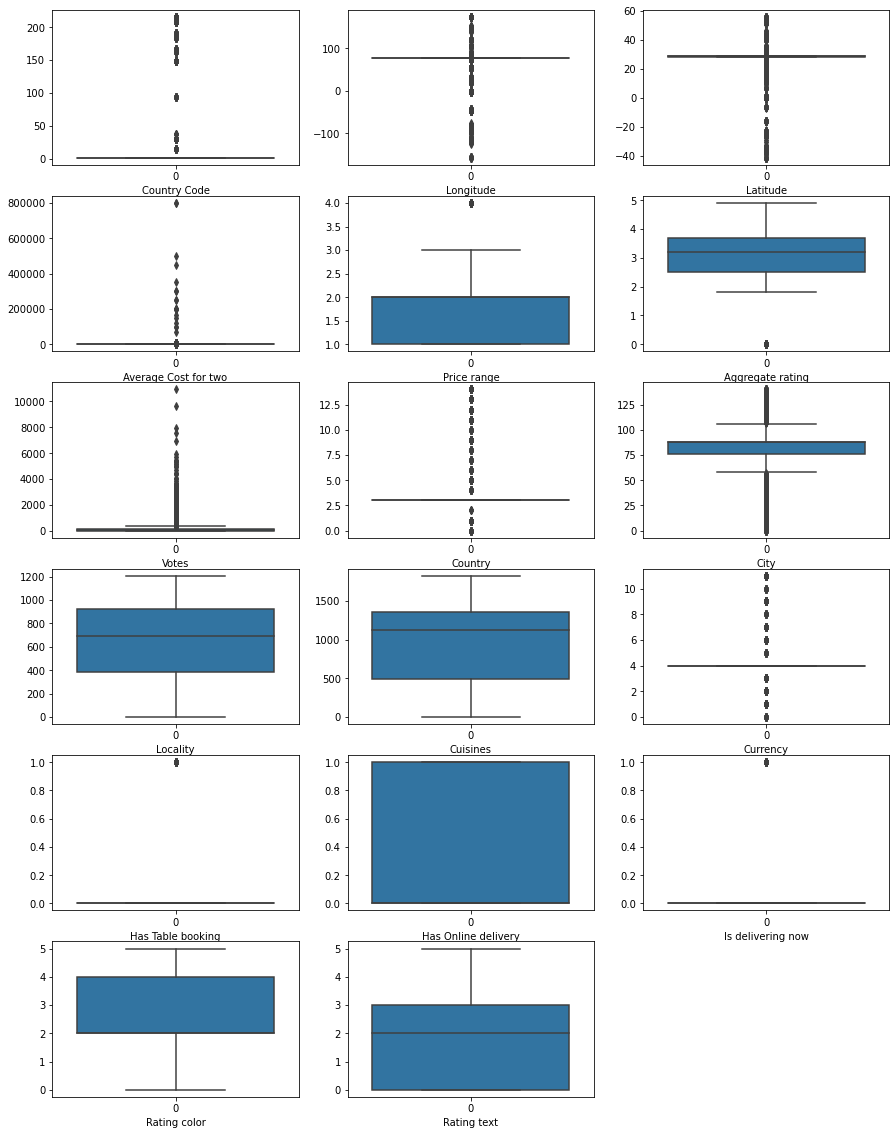

In [140]:
# seeing the outliers using boxplot.
plt.figure(figsize=(15,20))
plotnumber=1
for columns in data1:
    if plotnumber<=18:
        plt.subplot(6,3,plotnumber)
        ax=sns.boxplot(data=data1[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show()


In [141]:
#Using Z-Score method.
from scipy.stats import zscore

In [142]:
z=np.abs(zscore(data1))
z

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Country,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text
0,0.306015,0.334861,0.118764,0.021663,1.319803,0.813580,0.039312,0.277839,3.332289,2.029851,1.018171,0.024395,0.371446,0.587547,0.059771,1.371170,0.124686
1,0.306015,1.546527,2.348827,0.030968,0.215516,0.549780,0.199722,0.277839,3.332289,2.029851,1.018171,0.024395,0.371446,0.587547,0.059771,1.371170,0.124686
2,0.306015,0.334862,0.118689,0.043374,0.215516,0.615730,0.146252,0.277839,3.332289,2.029851,0.614050,0.024395,0.371446,0.587547,0.059771,1.371170,0.124686
3,0.306015,0.334536,0.121877,0.049578,0.215516,0.879530,0.162525,0.277839,3.332289,1.437798,1.272690,0.024395,0.371446,0.587547,0.059771,1.308053,1.895070
4,0.306015,0.334765,0.122404,0.012358,1.319803,1.011430,0.046706,0.277839,3.332289,1.437798,0.744223,0.024395,0.371446,0.587547,0.059771,1.308053,1.895070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,3.482693,3.773364,1.512081,0.073771,0.888771,0.681680,0.129978,3.870249,2.444146,1.633280,1.888396,2.163326,0.371446,0.587547,0.059771,1.371170,0.124686
9547,3.482693,3.773370,1.512037,0.073771,0.888771,0.549780,0.229944,3.870249,2.444146,1.633280,1.564124,2.163326,0.371446,0.587547,0.059771,1.371170,0.124686
9548,3.482693,3.773071,1.509099,0.072840,0.215516,0.813580,0.002115,3.870249,2.444146,1.633280,0.262386,2.163326,0.371446,0.587547,0.059771,1.371170,0.124686
9549,3.482693,3.488640,1.321086,0.072840,0.215516,0.813580,0.002115,3.870249,2.487254,1.639612,1.307471,2.163326,0.371446,0.587547,0.059771,1.371170,0.124686


In [143]:
data_new=data1[(z<3).all(axis=1)]
data_new

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Country,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text
82,1,75.346017,19.876219,800,3,3.6,240,3,11,19,1338,4,0,0,0,5,2
83,1,0.000000,0.000000,850,3,3.3,65,3,11,187,1049,4,0,0,0,2,0
84,1,75.353942,19.874733,600,2,3.3,63,3,11,150,1329,4,0,0,0,2,0
85,1,75.340775,19.876106,700,2,3.1,19,3,11,150,1618,4,0,0,0,2,0
86,1,75.367127,19.875522,350,2,3.4,46,3,11,150,1554,4,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,184,103.858430,1.301707,60,4,3.2,32,8,118,722,1821,2,0,0,0,2,0
8859,184,103.839165,1.290084,95,4,3.2,30,8,118,852,83,2,0,0,0,2,0
8860,184,103.858181,1.303035,50,3,3.8,28,8,118,1026,17,2,0,0,0,5,2
8861,184,103.848254,1.281970,40,3,3.9,35,8,118,1050,895,2,0,0,0,5,2


In [144]:
Dataloss=(9551-8408)/9551*100
Dataloss

11.967333263532614

# skewness Check

In [145]:
data_new.skew()

Country Code            19.985320
Longitude               -3.702347
Latitude                -3.241005
Average Cost for two     3.716607
Price range              1.054225
Aggregate rating        -0.861415
Votes                    3.730394
Country                 20.254626
City                    -1.392152
Locality                -0.316614
Cuisines                -0.345840
Currency               -18.026851
Has Table booking        2.269837
Has Online delivery      1.001452
Is delivering now        0.000000
Rating color             0.101035
Rating text              0.422542
dtype: float64

In [146]:
# Removing country code column from the dataset. As the skewness is high , gives minimum corelation value for both Targets and 
# scored less in best_features also

In [147]:
data_new.drop(columns=['Country Code'],axis=1,inplace=True)

In [148]:
data_new.skew()

Longitude               -3.702347
Latitude                -3.241005
Average Cost for two     3.716607
Price range              1.054225
Aggregate rating        -0.861415
Votes                    3.730394
Country                 20.254626
City                    -1.392152
Locality                -0.316614
Cuisines                -0.345840
Currency               -18.026851
Has Table booking        2.269837
Has Online delivery      1.001452
Is delivering now        0.000000
Rating color             0.101035
Rating text              0.422542
dtype: float64

In [149]:
# Removing country and Currency columns also from the dataset, As the skewness is high , gives minimum corelation value for both Targets and 
# scored less in best_features also
data_new.drop(columns=['Country','Currency'],axis=1,inplace=True)

In [150]:
data_new.skew()

Longitude              -3.702347
Latitude               -3.241005
Average Cost for two    3.716607
Price range             1.054225
Aggregate rating       -0.861415
Votes                   3.730394
City                   -1.392152
Locality               -0.316614
Cuisines               -0.345840
Has Table booking       2.269837
Has Online delivery     1.001452
Is delivering now       0.000000
Rating color            0.101035
Rating text             0.422542
dtype: float64

In [151]:
from sklearn.preprocessing import PowerTransformer

In [152]:
pt=PowerTransformer()
pwr=pt.fit_transform(data_new)
data_pwr=pd.DataFrame(data=pwr,columns=data_new.columns)
data_pwr

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text
0,-0.042531,-2.353591,0.751360,1.403141,0.770947,1.283113,-2.315914,-2.131517,0.654186,-0.377759,-0.617682,0.0,1.338544,0.490894
1,-3.687255,-3.222640,0.833359,1.403141,0.498261,0.596009,-2.315914,-1.598010,0.088382,-0.377759,-0.617682,0.0,-0.744420,-1.098011
2,-0.041535,-2.353841,0.364207,0.726470,0.498261,0.579786,-2.315914,-1.716860,0.636642,-0.377759,-0.617682,0.0,-0.744420,-1.098011
3,-0.043189,-2.353610,0.571255,0.726470,0.323424,-0.029961,-2.315914,-1.716860,1.197919,-0.377759,-0.617682,0.0,-0.744420,-1.098011
4,-0.039878,-2.353708,-0.352390,0.726470,0.587776,0.417284,-2.315914,-1.716860,1.073977,-0.377759,-0.617682,0.0,-0.744420,-1.098011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,4.714820,-3.222527,-2.611637,1.750427,0.410140,0.231731,3.391906,0.149925,1.589853,-0.377759,-0.617682,0.0,-0.744420,-1.098011
8404,4.710758,-3.222529,-2.036627,1.750427,0.410140,0.198991,3.391906,0.579431,-1.869696,-0.377759,-0.617682,0.0,-0.744420,-1.098011
8405,4.714768,-3.222526,-2.836694,1.403141,0.959573,0.164089,3.391906,1.156165,-2.015808,-0.377759,-0.617682,0.0,1.338544,0.490894
8406,4.712674,-3.222531,-3.109528,1.403141,1.055908,0.277328,3.391906,1.235863,-0.215461,-0.377759,-0.617682,0.0,1.338544,0.490894


In [153]:
data_pwr.skew()

Longitude               0.348925
Latitude               -2.648645
Average Cost for two    0.015928
Price range             0.252381
Aggregate rating       -0.632827
Votes                  -0.005826
City                    0.178532
Locality               -0.301497
Cuisines               -0.370551
Has Table booking       2.269837
Has Online delivery     1.001452
Is delivering now       0.000000
Rating color           -0.073111
Rating text            -0.030625
dtype: float64

In [154]:
# Trying quantile Transformer method,
from sklearn.preprocessing import QuantileTransformer

In [155]:
qt=QuantileTransformer()
qua=qt.fit_transform(data_new)
data_qua=pd.DataFrame(data=qua,columns=data_new.columns)
data_qua

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text
0,0.069628,0.082087,0.810310,0.897397,0.784785,0.893894,0.001502,0.004186,0.732733,0.0,0.0,0.0,1.000000,0.548549
1,0.000000,0.000000,0.832833,0.897397,0.626627,0.688188,0.001502,0.063699,0.460557,0.0,0.0,0.0,0.296296,0.000000
2,0.069813,0.082080,0.678679,0.672673,0.626627,0.683183,0.001502,0.044044,0.693694,0.0,0.0,0.0,0.296296,0.000000
3,0.069505,0.082085,0.760260,0.672673,0.507508,0.471471,0.001502,0.044044,0.895896,0.0,0.0,0.0,0.296296,0.000000
4,0.070075,0.082081,0.351351,0.672673,0.681682,0.629630,0.001502,0.044044,0.870370,0.0,0.0,0.0,0.296296,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,0.998999,0.059005,0.004204,1.000000,0.568569,0.565065,0.989489,0.513625,1.000000,0.0,0.0,0.0,0.296296,0.000000
8404,0.997998,0.058081,0.004905,1.000000,0.568569,0.552052,0.989489,0.628463,0.015015,0.0,0.0,0.0,0.296296,0.000000
8405,0.998991,0.059059,0.003003,0.897397,0.869369,0.541542,0.989489,0.887548,0.001436,0.0,0.0,0.0,1.000000,0.548549
8406,0.998435,0.058052,0.000907,0.897397,0.904905,0.582583,0.989489,0.905675,0.417417,0.0,0.0,0.0,1.000000,0.548549


In [156]:
data_qua.skew()

Longitude              -0.029054
Latitude               -0.029009
Average Cost for two    0.004099
Price range             0.186026
Aggregate rating       -0.180090
Votes                  -0.108618
City                   -0.137646
Locality                0.000016
Cuisines               -0.001126
Has Table booking       2.269837
Has Online delivery     1.001452
Is delivering now       0.000000
Rating color            0.338646
Rating text             0.029625
dtype: float64

In [157]:
# Choosing quantile transformer method Data as the skewness is well reduced.

# Preprocessing

In [158]:
features=data_qua.drop(columns=['Average Cost for two'],axis=1)
Target=data_qua['Average Cost for two']

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
scaled=StandardScaler()
fea_sca=scaled.fit_transform(features)
fea_sca

array([[-1.47127007, -1.42846624,  1.35617989, ...,  0.        ,
         1.55943521,  0.37186349],
       [-1.71020747, -1.71014919,  1.35617989, ...,  0.        ,
        -0.73672213, -1.08428303],
       [-1.47063533, -1.42849107,  0.77603185, ...,  0.        ,
        -0.73672213, -1.08428303],
       ...,
       [ 1.71797929, -1.50748798,  1.35617989, ...,  0.        ,
         1.55943521,  0.37186349],
       [ 1.71607117, -1.510944  ,  1.35617989, ...,  0.        ,
         1.55943521,  0.37186349],
       [ 1.71679008, -1.50821821,  1.62105816, ...,  0.        ,
        -0.73672213, -1.08428303]])

# Checking Multicollinearity using VIF.

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [162]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(fea_sca,i) for i in range(fea_sca.shape[1])]
vif['Columns']=features.columns
vif

,VIF,Columns
0,1.268835,Longitude
1,1.173912,Latitude
2,1.700967,Price range
3,3.849622,Aggregate rating
4,4.484383,Votes
5,1.345915,City
6,1.044759,Locality
7,1.033807,Cuisines
8,1.336052,Has Table booking
9,1.197345,Has Online delivery


In [163]:
# The VIF values is Good to go for our Dataset.

# Model Building for Regression(Averagecost for two)

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [165]:
lr=LinearRegression()

In [166]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,Target,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random State:",i)
        print("The Model Training score is:",r2_score(y_train,pred_train)*100)
        print("The Model Test score is :",r2_score(y_test,pred_test)*100)

At Random State: 181
The Model Training score is: 82.14848355202803
The Model Test score is : 82.11477069006305
At Random State: 279
The Model Training score is: 82.14194109175214
The Model Test score is : 82.14446558953566
At Random State: 286
The Model Training score is: 82.14192547332809
The Model Test score is : 82.13298987982864
At Random State: 399
The Model Training score is: 82.14441151625289
The Model Test score is : 82.12690431177523
At Random State: 424
The Model Training score is: 82.14338772168853
The Model Test score is : 82.13846064830892
At Random State: 530
The Model Training score is: 82.14813925870018
The Model Test score is : 82.14438129192469
At Random State: 691
The Model Training score is: 82.14116182127644
The Model Test score is : 82.12527882474883
At Random State: 948
The Model Training score is: 82.14829045421213
The Model Test score is : 82.083008479789
At Random State: 957
The Model Training score is: 82.14662941491795
The Model Test score is : 82.132669117

In [167]:
# choosing 957 as random_state

In [168]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(features,Target,test_size=0.25,random_state=957)
lr.fit(x_train,y_train)

LinearRegression()

In [169]:
pred_test=lr.predict(x_test)
r2_score(y_test,pred_test)*100

82.13266911705836

In [170]:
mae=mean_absolute_error(y_test,pred_test)
mae

0.09599781723001746

In [171]:
mse=mean_squared_error(y_test,pred_test)
mse

0.014738765219416633

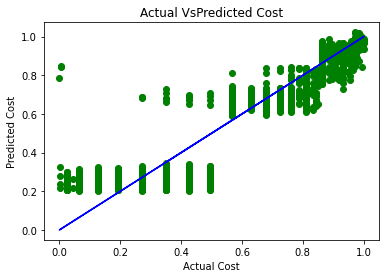

In [172]:
# plt.figure(figsize=(6,7))
plt.scatter(x=y_test,y=pred_test,color='green')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual VsPredicted Cost')
plt.show()

# Cross Valid Score

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
for j in range(2,10):
    cv_score=cross_val_score(lr,features,Target,cv=j)
    cv_mean=cv_score.mean()
    print("At Cross fold",j,"The CV Score is:",cv_mean*100,"The testing score:",r2_score(y_test,pred_test)*100 )
    print("The Difference between the crossvalidationscore and the modelscore is:",r2_score(y_test,pred_test)*100-cv_mean*100)
    print("\n")

At Cross fold 2 The CV Score is: 81.21564378152198 The testing score: 82.13266911705836
The Difference between the crossvalidationscore and the modelscore is: 0.9170253355363798


At Cross fold 3 The CV Score is: 81.59926321673089 The testing score: 82.13266911705836
The Difference between the crossvalidationscore and the modelscore is: 0.533405900327466


At Cross fold 4 The CV Score is: 81.39689585951004 The testing score: 82.13266911705836
The Difference between the crossvalidationscore and the modelscore is: 0.7357732575483169


At Cross fold 5 The CV Score is: 81.17365792396795 The testing score: 82.13266911705836
The Difference between the crossvalidationscore and the modelscore is: 0.9590111930904044


At Cross fold 6 The CV Score is: 80.95625344171307 The testing score: 82.13266911705836
The Difference between the crossvalidationscore and the modelscore is: 1.1764156753452824


At Cross fold 7 The CV Score is: 80.98937080951953 The testing score: 82.13266911705836
The Differenc

In [175]:
# at Cross fold cv=3,the difference is less.and building the other models with same cv fold

In [176]:
# Defining a function for building models
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvscore=cross_val_score(algorithm,features,Target,cv=3)
    cvm=cvscore.mean()
    print("The Model Name is :",algorithm)
    print("The Model Training score is:",r2_score(y_train,pred_algo_train)*100)
    print("The Model Test score is :",r2_score(y_test,pred_algo_test)*100)
    print("The Cross Validation score is:",cvm*100)
    print("The Difference between the crossvalidation and the testscore is:",cvm*100-r2_score(y_test,pred_algo_test)*100)
    print("The Mean squared error is :",mean_squared_error(y_test,pred_algo_test))
    print("The Mean absolute Error is :",mean_absolute_error(y_test,pred_algo_test))

# Decision Tree Regressor

In [179]:
# Training the Model with Decision Tree  Regressor
from sklearn.tree import DecisionTreeRegressor


In [180]:
dt=DecisionTreeRegressor()
model_selection(dt,x_train,x_test,y_train,y_test)

The Model Name is : DecisionTreeRegressor()
The Model Training score is: 99.98745619977922
The Model Test score is : 76.43022807616593
The Cross Validation score is: 71.99589264930206
The Difference between the crossvalidation and the testscore is: -4.434335426863868
The Mean squared error is : 0.019442710102394137
The Mean absolute Error is : 0.09783611872771938


# using gridsearchCv

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
parameters={'criterion' :["squared_error", "friedman_mse", "absolute_error"],'max_depth':range(2,5),'min_samples_split':[2,3,4]}

In [185]:
grd_dt=GridSearchCV(dt,param_grid= parameters)
grd_dt.fit(x_train,y_train)
print(grd_dt.best_params_)

{'criterion': 'squared_error', 'max_depth': 4, 'min_samples_split': 2}


In [186]:
dt_hyper=DecisionTreeRegressor(criterion= 'squared_error', max_depth= 4, min_samples_split=2)

In [187]:
model_selection(dt_hyper,x_train,x_test,y_train,y_test)

The Model Name is : DecisionTreeRegressor(max_depth=4)
The Model Training score is: 85.24323434291922
The Model Test score is : 85.02988386219309
The Cross Validation score is: 82.16480905786807
The Difference between the crossvalidation and the testscore is: -2.865074804325019
The Mean squared error is : 0.012348852131752215
The Mean absolute Error is : 0.08785760944800769


In [188]:
# the Decisiontree is giving nice test score,after hyperTuning.

# KNeighbors Regressor

In [189]:
from sklearn.neighbors import KNeighborsRegressor

In [190]:
knn=KNeighborsRegressor()

In [191]:
model_selection(knn,x_train,x_test,y_train,y_test)

The Model Name is : KNeighborsRegressor()
The Model Training score is: 87.05961403699469
The Model Test score is : 80.88400867727844
The Cross Validation score is: 78.89005314286361
The Difference between the crossvalidation and the testscore is: -1.9939555344148374
The Mean squared error is : 0.015768785493919985
The Mean absolute Error is : 0.0986227886956872


# Using GridsearchCV

In [193]:
parameters={'weights' : ['uniform', 'distance'],'n_neighbors':range(2,5),'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],}

In [194]:
grd_knc=GridSearchCV(knn,param_grid=parameters)
grd_knc.fit(x_train,y_train)
print(grd_knc.best_params_)

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}


In [195]:
knc_hyper=KNeighborsRegressor(algorithm= 'auto', n_neighbors= 4, weights= 'uniform')

In [196]:
model_selection(knc_hyper,x_train,x_test,y_train,y_test)

The Model Name is : KNeighborsRegressor(n_neighbors=4)
The Model Training score is: 88.02003275954546
The Model Test score is : 80.39707182195417
The Cross Validation score is: 78.20967771636343
The Difference between the crossvalidation and the testscore is: -2.187394105590741
The Mean squared error is : 0.01617045981418219
The Mean absolute Error is : 0.09942996923824417


In [197]:
# The is no improvement in the test score.

# SVM Regressor

In [198]:
from sklearn.svm import SVR

In [199]:
svr=SVR()

In [200]:
model_selection(svr,x_train,x_test,y_train,y_test)

The Model Name is : SVR()
The Model Training score is: 85.18356254854493
The Model Test score is : 83.54029763676172
The Cross Validation score is: 78.52069062583838
The Difference between the crossvalidation and the testscore is: -5.0196070109233375
The Mean squared error is : 0.013577612140426522
The Mean absolute Error is : 0.0925871737925101


# using GridserchCV

In [202]:
parameters={'kernel' :['linear', 'poly', 'rbf'],'gamma' : ['scale', 'auto'],'C':[0.001,0.1,1.0]}

In [203]:
grd_svr=GridSearchCV(svr,param_grid=parameters)
grd_svr.fit(x_train,y_train)
print(grd_svr.best_params_)

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [204]:
svr_hyper=SVR(C=1.0, gamma= 'scale',kernel= 'rbf')

In [205]:
model_selection(svr_hyper,x_train,x_test,y_train,y_test)

The Model Name is : SVR()
The Model Training score is: 85.18356254854493
The Model Test score is : 83.54029763676172
The Cross Validation score is: 78.52069062583838
The Difference between the crossvalidation and the testscore is: -5.0196070109233375
The Mean squared error is : 0.013577612140426522
The Mean absolute Error is : 0.0925871737925101


In [206]:
# there is no improvement in the test score.

In [207]:
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor

In [208]:
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()

In [209]:
model_selection(sgd,x_train,x_test,y_train,y_test)
model_selection(lasso,x_train,x_test,y_train,y_test)
model_selection(ridge,x_train,x_test,y_train,y_test)

The Model Name is : SGDRegressor()
The Model Training score is: 81.90675333200838
The Model Test score is : 81.9972098409007
The Cross Validation score is: 80.79545200445042
The Difference between the crossvalidation and the testscore is: -1.2017578364502697
The Mean squared error is : 0.01485050560644814
The Mean absolute Error is : 0.09646278848535525
The Model Name is : Lasso()
The Model Training score is: 0.0
The Model Test score is : -0.11757426465073273
The Cross Validation score is: -4.233622293647632
The Difference between the crossvalidation and the testscore is: -4.116048028996899
The Mean squared error is : 0.08258700927920884
The Mean absolute Error is : 0.24907446951712334
The Model Name is : Ridge()
The Model Training score is: 82.1465273771689
The Model Test score is : 82.13269115879369
The Cross Validation score is: 81.60236600014109
The Difference between the crossvalidation and the testscore is: -0.5303251586526017
The Mean squared error is : 0.014738747037184254
The 

# usingGridSearchCV(SGDRegressor)

In [214]:
parameters={'penalty' : ['l2', 'l1', 'elasticnet'],'alpha':[0.001,0.1,0.001]}

In [215]:
grd_SGD=GridSearchCV(sgd,param_grid=parameters)
grd_SGD.fit(x_train,y_train)
print(grd_SGD.best_params_)

{'alpha': 0.001, 'penalty': 'l1'}


In [216]:
sgd_hyper=SGDRegressor(alpha= 0.001, penalty= 'l1')

In [218]:
model_selection(sgd_hyper,x_train,x_test,y_train,y_test)

The Model Name is : SGDRegressor(alpha=0.001, penalty='l1')
The Model Training score is: 81.97310672192219
The Model Test score is : 82.06079744951813
The Cross Validation score is: 81.06357933036094
The Difference between the crossvalidation and the testscore is: -0.9972181191571963
The Mean squared error is : 0.014798052173956373
The Mean absolute Error is : 0.09644354525839308


In [ ]:
#The test score is slightly improved after hyper tuning

# EnsembleTechniques

In [210]:
# Training the Models with Ensemble methods 
from sklearn.ensemble import RandomForestRegressor              #randomforestRegressor
from sklearn.ensemble import AdaBoostRegressor                  #AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor          #GradientBoostRegressor
from xgboost import XGBRegressor                                # ExtraGradientBoostRegressor

In [211]:
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gbt=GradientBoostingRegressor()
xgb=XGBRegressor()

In [212]:
model_selection(rf,x_train,x_test,y_train,y_test)
model_selection(ada,x_train,x_test,y_train,y_test)
model_selection(gbt,x_train,x_test,y_train,y_test)
model_selection(xgb,x_train,x_test,y_train,y_test)

The Model Name is : RandomForestRegressor()
The Model Training score is: 98.22553332716812
The Model Test score is : 87.36695361721522
The Cross Validation score is: 84.01543345735288
The Difference between the crossvalidation and the testscore is: -3.351520159862332
The Mean squared error is : 0.010421002771019969
The Mean absolute Error is : 0.07782201200821834
The Model Name is : AdaBoostRegressor()
The Model Training score is: 82.92661086793967
The Model Test score is : 82.67630289496611
The Cross Validation score is: 81.77707558652091
The Difference between the crossvalidation and the testscore is: -0.8992273084452052
The Mean squared error is : 0.0142903215951047
The Mean absolute Error is : 0.10050137430510528
The Model Name is : GradientBoostingRegressor()
The Model Training score is: 88.50596493751999
The Model Test score is : 87.70160967731329
The Cross Validation score is: 84.29622070161
The Difference between the crossvalidation and the testscore is: -3.405388975703289
The 

# GridSearchCV(RandomForest)

In [219]:
parameters={'n_estimators':range(10,100,10),'max_depth':range(2,5),'min_samples_split':[2,3,4],'min_samples_leaf':[1.0,0.1,0.5]}

In [220]:
grd_rf=GridSearchCV(rf,param_grid=parameters)
grd_rf.fit(x_train,y_train)
print(grd_rf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 3, 'n_estimators': 40}


In [221]:
rf_hyper=RandomForestRegressor(max_depth= 3, min_samples_leaf= 0.1, min_samples_split= 3, n_estimators= 40)

In [222]:
model_selection(rf_hyper,x_train,x_test,y_train,y_test)

The Model Name is : RandomForestRegressor(max_depth=3, min_samples_leaf=0.1, min_samples_split=3,
                      n_estimators=40)
The Model Training score is: 80.99683295517382
The Model Test score is : 81.07954485814061
The Cross Validation score is: 78.05377204673563
The Difference between the crossvalidation and the testscore is: -3.025772811404977
The Mean squared error is : 0.015607487654835338
The Mean absolute Error is : 0.10090592784474063


In [223]:
# Random Forest gives best score before hyper Tuning

# out of all models and tried hyper Tuning for few models,Linear Regression is the best model as the difference between the 
# Cross val score and the test score is less

# ModelSaving For [Average cost for two]:

In [178]:
import pickle

In [183]:
filename='Averagecostfortwo.pkl'
pickle.dump(lr,open(filename,'wb'))


In [184]:
load_model=pickle.load(open('Averagecostfortwo.pkl','rb'))
result=load_model.score(x_test,y_test)*100
result


82.13266911705836

In [186]:
prediction=load_model.predict(x_test)
a=np.array(y_test)
predicted=np.array(prediction)
conclusion=pd.DataFrame({'Actual':a,'predicted':predicted})
conclusion

,Actual,predicted
0,0.351351,0.254266
1,0.568068,0.690381
2,0.841842,0.643118
3,0.126627,0.225167
4,0.192693,0.305231
...,...,...
2097,0.271772,0.254006
2098,0.192693,0.229212
2099,0.996496,0.987647
2100,0.496496,0.276505


# Model building for pricerange

In [187]:
# final data after removing all skewness,outliers 
data_qua

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text
0,0.069628,0.082087,0.810310,0.897397,0.784785,0.893894,0.001502,0.004186,0.732733,0.0,0.0,0.0,1.000000,0.548549
1,0.000000,0.000000,0.832833,0.897397,0.626627,0.688188,0.001502,0.063699,0.460557,0.0,0.0,0.0,0.296296,0.000000
2,0.069813,0.082080,0.678679,0.672673,0.626627,0.683183,0.001502,0.044044,0.693694,0.0,0.0,0.0,0.296296,0.000000
3,0.069505,0.082085,0.760260,0.672673,0.507508,0.471471,0.001502,0.044044,0.895896,0.0,0.0,0.0,0.296296,0.000000
4,0.070075,0.082081,0.351351,0.672673,0.681682,0.629630,0.001502,0.044044,0.870370,0.0,0.0,0.0,0.296296,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,0.998999,0.059005,0.004204,1.000000,0.568569,0.565065,0.989489,0.513625,1.000000,0.0,0.0,0.0,0.296296,0.000000
8404,0.997998,0.058081,0.004905,1.000000,0.568569,0.552052,0.989489,0.628463,0.015015,0.0,0.0,0.0,0.296296,0.000000
8405,0.998991,0.059059,0.003003,0.897397,0.869369,0.541542,0.989489,0.887548,0.001436,0.0,0.0,0.0,1.000000,0.548549
8406,0.998435,0.058052,0.000907,0.897397,0.904905,0.582583,0.989489,0.905675,0.417417,0.0,0.0,0.0,1.000000,0.548549


In [188]:
x=data_qua.drop('Price range',axis=1)
x

,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text
0,0.069628,0.082087,0.810310,0.784785,0.893894,0.001502,0.004186,0.732733,0.0,0.0,0.0,1.000000,0.548549
1,0.000000,0.000000,0.832833,0.626627,0.688188,0.001502,0.063699,0.460557,0.0,0.0,0.0,0.296296,0.000000
2,0.069813,0.082080,0.678679,0.626627,0.683183,0.001502,0.044044,0.693694,0.0,0.0,0.0,0.296296,0.000000
3,0.069505,0.082085,0.760260,0.507508,0.471471,0.001502,0.044044,0.895896,0.0,0.0,0.0,0.296296,0.000000
4,0.070075,0.082081,0.351351,0.681682,0.629630,0.001502,0.044044,0.870370,0.0,0.0,0.0,0.296296,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,0.998999,0.059005,0.004204,0.568569,0.565065,0.989489,0.513625,1.000000,0.0,0.0,0.0,0.296296,0.000000
8404,0.997998,0.058081,0.004905,0.568569,0.552052,0.989489,0.628463,0.015015,0.0,0.0,0.0,0.296296,0.000000
8405,0.998991,0.059059,0.003003,0.869369,0.541542,0.989489,0.887548,0.001436,0.0,0.0,0.0,1.000000,0.548549
8406,0.998435,0.058052,0.000907,0.904905,0.582583,0.989489,0.905675,0.417417,0.0,0.0,0.0,1.000000,0.548549


In [193]:
y=data_new['Price range']
y

82      3
83      3
84      2
85      2
86      2
       ..
8858    4
8859    4
8860    3
8861    3
8862    4
Name: Price range, Length: 8408, dtype: int64

In [194]:
y.value_counts()

1    4269
2    2775
3     997
4     367
Name: Price range, dtype: int64

# standardization

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaled=StandardScaler()

In [197]:
x_scaled=scaled.fit_transform(x)
x_scaled

array([[-1.47127007, -1.42846624,  1.07725566, ...,  0.        ,
         1.55943521,  0.37186349],
       [-1.71020747, -1.71014919,  1.15546972, ...,  0.        ,
        -0.73672213, -1.08428303],
       [-1.47063533, -1.42849107,  0.62013791, ...,  0.        ,
        -0.73672213, -1.08428303],
       ...,
       [ 1.71797929, -1.50748798, -1.72628401, ...,  0.        ,
         1.55943521,  0.37186349],
       [ 1.71607117, -1.510944  , -1.73356342, ...,  0.        ,
         1.55943521,  0.37186349],
       [ 1.71679008, -1.50821821, -1.72106973, ...,  0.        ,
        -0.73672213, -1.08428303]])

# Multicollinearity using VIF

In [198]:
vif1=pd.DataFrame()
vif1['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif1['Columns']=x.columns
vif1

,VIF,Columns
0,1.269360,Longitude
1,1.165653,Latitude
2,1.873034,Average Cost for two
3,3.849942,Aggregate rating
4,4.558164,Votes
5,1.345776,City
6,1.044735,Locality
7,1.032395,Cuisines
8,1.418817,Has Table booking
9,1.203728,Has Online delivery


In [199]:
# all VIF values are good to Go.

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [201]:
# To select Random state,and to find where the accuracy rate is high.
lr=LogisticRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At Random State",i)
        print("The Training score is:",accuracy_score(y_train,pred_train)*100)
        print("The Test Score is :",accuracy_score(y_test,pred_test)*100)

At Random State 0
The Training score is: 93.5616872819537
The Test Score is : 93.52997145575642
At Random State 1
The Training score is: 93.13352362829052
The Test Score is : 93.14938154138915
At Random State 2
The Training score is: 93.32381858547414
The Test Score is : 93.4348239771646
At Random State 3
The Training score is: 92.6895020615287
The Test Score is : 93.00666032350142
At Random State 4
The Training score is: 93.29210275927687
The Test Score is : 93.10180780209323
At Random State 7
The Training score is: 92.81636536631778
The Test Score is : 92.76879162702188
At Random State 9
The Training score is: 93.97399302251823
The Test Score is : 93.91056137012369
At Random State 13
The Training score is: 93.73612432603869
The Test Score is : 94.24357754519505
At Random State 14
The Training score is: 93.48239771646053
The Test Score is : 92.72121788772597
At Random State 15
The Training score is: 92.67364414843007
The Test Score is : 93.19695528068506
At Random State 16
The Trainin

In [202]:
# choosing Random state 411

In [203]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=411)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test)*100)
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

94.19600380589914
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1070
           2       0.94      0.97      0.95       704
           3       0.78      0.85      0.81       236
           4       0.92      0.49      0.64        92

    accuracy                           0.94      2102
   macro avg       0.90      0.82      0.85      2102
weighted avg       0.94      0.94      0.94      2102

[[1055   15    0    0]
 [   7  680   17    0]
 [   2   30  200    4]
 [   5    1   41   45]]


# # Cross_validation

In [204]:
from sklearn.model_selection import cross_val_score

In [206]:
for j in range(2,10):
    lss_score=cross_val_score(lr,x_scaled,y,cv=j)
    print(lss_score)
    lsc_score=lss_score.mean()
    print("At CV Fold,:",j)
    print("Cross Valid Score is:",lsc_score*100)
    print("Accuracy Score is :",accuracy_score(y_test,pred_test)*100)
    print("The Difference between the Cross Val score and accuracy is:",accuracy_score(y_test,pred_test)*100-lsc_score*100)

[0.86726927 0.89391056]
At CV Fold,: 2
Cross Valid Score is: 88.05899143672693
Accuracy Score is : 94.19600380589914
The Difference between the Cross Val score and accuracy is: 6.137012369172211
[0.87120942 0.9275776  0.92433976]
At CV Fold,: 3
Cross Valid Score is: 90.77089237432888
Accuracy Score is : 94.19600380589914
The Difference between the Cross Val score and accuracy is: 3.425111431570258
[0.90723121 0.90342531 0.93720266 0.91484301]
At CV Fold,: 4
Cross Valid Score is: 91.56755470980018
Accuracy Score is : 94.19600380589914
The Difference between the Cross Val score and accuracy is: 2.6284490960989615
[0.91319857 0.8882283  0.93995244 0.94824509 0.9143367 ]
At CV Fold,: 5
Cross Valid Score is: 92.07922213789
Accuracy Score is : 94.19600380589914
The Difference between the Cross Val score and accuracy is: 2.116781668009139
[0.89300999 0.88587732 0.9350464  0.94218415 0.95217702 0.91006424]
At CV Fold,: 6
Cross Valid Score is: 91.97265182841005
Accuracy Score is : 94.1960038058

In [207]:
# At cv=8,we have less difference,we will use the same for building other models

In [208]:
# Defining a Function for getting Model score:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvs=cross_val_score(algorithm,x_scaled,y,cv=8)
    cvc=cvs.mean()
    print("The Model Name is ",algorithm)
    print("The Accuracy score of the Model Training Data:",accuracy_score(y_train,pred_algo_train)*100)
    print("The Accuracy score of the Model Test Data:",accuracy_score(y_test,pred_algo_test)*100)
    print("The Cross Valid Score of the Algorithm:",cvc*100)
    print("The Classification report of the Model is :",classification_report(y_test,pred_algo_test))
    print("The Confusion Matrix is :",confusion_matrix(y_test,pred_algo_test))
    print("The Difference between Cross Val score and Accuracy score is: ",accuracy_score(y_test,pred_algo_test)*100-cvc*100)
    

# DecisionTreeClassifier

In [209]:
# Training the Model with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [211]:
dtc=DecisionTreeClassifier()

In [212]:
model_selection(dtc,x_train,x_test,y_train,y_test)

The Model Name is  DecisionTreeClassifier()
The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 98.81065651760228
The Cross Valid Score of the Algorithm: 96.36060894386299
The Classification report of the Model is :               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1070
           2       0.99      0.99      0.99       704
           3       0.96      0.97      0.97       236
           4       0.96      0.89      0.93        92

    accuracy                           0.99      2102
   macro avg       0.98      0.96      0.97      2102
weighted avg       0.99      0.99      0.99      2102

The Confusion Matrix is : [[1067    3    0    0]
 [   2  698    4    0]
 [   0    3  230    3]
 [   0    4    6   82]]
The Difference between Cross Val score and Accuracy score is:  2.4500475737392975


# using GridSearchCV

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
parameters={'criterion' : ["gini", "entropy"],'max_depth':range(2,5),'min_samples_leaf':[0.1,1,0.01],'min_samples_split':range(2,5)}

In [216]:
grd_dt=GridSearchCV(dt,param_grid=parameters)
grd_dt.fit(x_train,y_train)
print(grd_dt.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [217]:
dt_hyper=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 1, min_samples_split= 2)

In [218]:
model_selection(dt_hyper,x_train,x_test,y_train,y_test)

The Model Name is  DecisionTreeClassifier(max_depth=4)
The Accuracy score of the Model Training Data: 98.27148747224865
The Accuracy score of the Model Test Data: 98.09705042816366
The Cross Valid Score of the Algorithm: 97.19314938154139
The Classification report of the Model is :               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1070
           2       0.99      0.98      0.98       704
           3       0.90      0.98      0.94       236
           4       1.00      0.80      0.89        92

    accuracy                           0.98      2102
   macro avg       0.97      0.94      0.95      2102
weighted avg       0.98      0.98      0.98      2102

The Confusion Matrix is : [[1065    5    0    0]
 [   1  692   11    0]
 [   1    4  231    0]
 [   3    1   14   74]]
The Difference between Cross Val score and Accuracy score is:  0.9039010466222663


In [219]:
# decision Tree is giving same Test score

# KNeighborsClassifier

In [220]:
from sklearn.neighbors import KNeighborsClassifier

In [221]:
knc=KNeighborsClassifier()

In [222]:
model_selection(knc,x_train,x_test,y_train,y_test)

The Model Name is  KNeighborsClassifier()
The Accuracy score of the Model Training Data: 89.16904535363146
The Accuracy score of the Model Test Data: 83.34919124643197
The Cross Valid Score of the Algorithm: 72.2882968601332
The Classification report of the Model is :               precision    recall  f1-score   support

           1       0.93      0.92      0.93      1070
           2       0.77      0.84      0.81       704
           3       0.61      0.58      0.60       236
           4       0.66      0.34      0.45        92

    accuracy                           0.83      2102
   macro avg       0.74      0.67      0.69      2102
weighted avg       0.83      0.83      0.83      2102

The Confusion Matrix is : [[989  81   0   0]
 [ 68 594  40   2]
 [  3  81 138  14]
 [  3  11  47  31]]
The Difference between Cross Val score and Accuracy score is:  11.06089438629877


# GridSearch Cv for KNC

In [223]:
parameters={'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':range(2,5),'leaf_size':range(10,40)}

In [224]:
grd_knc=GridSearchCV(knc,param_grid=parameters)
grd_knc.fit(x_train,y_train)
print(grd_knc.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3}


In [225]:
knc_hyper=KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, n_neighbors= 3)

In [226]:
model_selection(knc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  KNeighborsClassifier(leaf_size=10, n_neighbors=3)
The Accuracy score of the Model Training Data: 91.53187440532827
The Accuracy score of the Model Test Data: 83.72978116079925
The Cross Valid Score of the Algorithm: 70.43292102759278
The Classification report of the Model is :               precision    recall  f1-score   support

           1       0.94      0.93      0.93      1070
           2       0.78      0.85      0.81       704
           3       0.63      0.56      0.59       236
           4       0.56      0.40      0.47        92

    accuracy                           0.84      2102
   macro avg       0.73      0.68      0.70      2102
weighted avg       0.83      0.84      0.83      2102

The Confusion Matrix is : [[994  76   0   0]
 [ 61 598  38   7]
 [  3  80 131  22]
 [  1  14  40  37]]
The Difference between Cross Val score and Accuracy score is:  13.296860133206465


In [227]:
# slight improvement only seen in the test score.

# SVM Classifier

In [228]:
from sklearn.svm import  SVC

In [229]:
svc=SVC()

In [230]:
model_selection(svc,x_train,x_test,y_train,y_test)

The Model Name is  SVC()
The Accuracy score of the Model Training Data: 93.59340310815097
The Accuracy score of the Model Test Data: 92.2930542340628
The Cross Valid Score of the Algorithm: 90.02140818268316
The Classification report of the Model is :               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1070
           2       0.92      0.95      0.93       704
           3       0.68      0.83      0.74       236
           4       0.96      0.27      0.42        92

    accuracy                           0.92      2102
   macro avg       0.89      0.76      0.77      2102
weighted avg       0.93      0.92      0.92      2102

The Confusion Matrix is : [[1054   16    0    0]
 [   6  666   32    0]
 [   2   38  195    1]
 [   5    1   61   25]]
The Difference between Cross Val score and Accuracy score is:  2.2716460513796335


# UsingGridSearchcv

In [231]:
parameters={'kernel' : ['linear', 'poly', 'rbf'],'gamma' : ['scale', 'auto'],'C':[0.001,0.1,1.0]}

In [232]:
grd_svc=GridSearchCV(svc,param_grid=parameters)
grd_svc.fit(x_train,y_train)
print(grd_svc.best_params_)

{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}


In [233]:
svc_hyper=SVC(C= 1.0, gamma= 'scale', kernel= 'linear')

In [234]:
model_selection(svc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  SVC(kernel='linear')
The Accuracy score of the Model Training Data: 96.25753250872185
The Accuracy score of the Model Test Data: 96.1465271170314
The Cross Valid Score of the Algorithm: 95.13558515699334
The Classification report of the Model is :               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1070
           2       0.97      0.97      0.97       704
           3       0.85      0.89      0.87       236
           4       0.89      0.67      0.77        92

    accuracy                           0.96      2102
   macro avg       0.92      0.88      0.90      2102
weighted avg       0.96      0.96      0.96      2102

The Confusion Matrix is : [[1070    0    0    0]
 [  12  680   12    0]
 [   2   17  209    8]
 [   5    1   24   62]]
The Difference between Cross Val score and Accuracy score is:  1.0109419600380534


# Ensemble Techniques

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [236]:
rf=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()


In [238]:
model_selection(rf,x_train,x_test,y_train,y_test)

model_selection(gbc,x_train,x_test,y_train,y_test)

model_selection(ada,x_train,x_test,y_train,y_test)


The Model Name is  RandomForestClassifier()
The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 98.52521408182683
The Cross Valid Score of the Algorithm: 97.32397716460514
The Classification report of the Model is :               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1070
           2       0.98      1.00      0.99       704
           3       0.94      0.96      0.95       236
           4       0.97      0.85      0.91        92

    accuracy                           0.99      2102
   macro avg       0.97      0.95      0.96      2102
weighted avg       0.99      0.99      0.99      2102

The Confusion Matrix is : [[1066    4    0    0]
 [   2  701    1    0]
 [   0    8  226    2]
 [   0    1   13   78]]
The Difference between Cross Val score and Accuracy score is:  1.2012369172216921
The Model Name is  GradientBoostingClassifier()
The Accuracy score of the Model Training Data: 99.936568

# GridsearchCvRandomForestClassifier

In [239]:
parameters={'criterion' : ["gini", "entropy"],'max_depth':range(2,5),'min_samples_leaf':[0.1,1,0.01],
            'min_samples_split':range(2,5),'n_estimators':range(10,60,10)}

In [240]:
grd_rf=GridSearchCV(rf,param_grid=parameters)
grd_rf.fit(x_train,y_train)
print(grd_rf.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}


In [241]:
rf_hyper=RandomForestClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf= 1, min_samples_split=2, n_estimators= 40)

In [242]:
model_selection(rf_hyper,x_train,x_test,y_train,y_test)

The Model Name is  RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=40)
The Accuracy score of the Model Training Data: 92.32477006026008
The Accuracy score of the Model Test Data: 92.57849666983824
The Cross Valid Score of the Algorithm: 93.14938154138915
The Classification report of the Model is :               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1070
           2       0.91      0.98      0.94       704
           3       0.72      0.73      0.73       236
           4       1.00      0.11      0.20        92

    accuracy                           0.93      2102
   macro avg       0.90      0.71      0.71      2102
weighted avg       0.93      0.93      0.91      2102

The Confusion Matrix is : [[1070    0    0    0]
 [  11  693    0    0]
 [   2   61  173    0]
 [   5   11   66   10]]
The Difference between Cross Val score and Accuracy score is:  -0.5708848715509021


In [243]:
# the testscore is reduced after hypertuning

# Grid Search Cv for Gradient Boosting Classifier

In [244]:
parameters={'learning_rate':[0.1,0.001,0.01],'min_samples_split':range(2,5),'max_depth':range(2,5)}

In [245]:
grd_gbc=GridSearchCV(gbc,param_grid=parameters)
grd_gbc.fit(x_train,y_train)
print(grd_gbc.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 3}


In [246]:
gbc_hyper=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4, min_samples_split= 3)

In [247]:
model_selection(gbc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  GradientBoostingClassifier(max_depth=4, min_samples_split=4)
The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 99.14367269267365
The Cross Valid Score of the Algorithm: 97.47859181731684
The Classification report of the Model is :               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1070
           2       0.99      1.00      0.99       704
           3       0.96      0.98      0.97       236
           4       0.99      0.92      0.96        92

    accuracy                           0.99      2102
   macro avg       0.98      0.97      0.98      2102
weighted avg       0.99      0.99      0.99      2102

The Confusion Matrix is : [[1067    3    0    0]
 [   0  701    3    0]
 [   0    4  231    1]
 [   0    0    7   85]]
The Difference between Cross Val score and Accuracy score is:  1.6650808753568072


In [248]:
#the test score is high after hypertuning

# GridSearch Cv for AdaBoostClassifier

In [249]:
parameters={'n_estimators':range(10,60,10),'learning_rate':[0.1,0.001,0.01]}

In [250]:
grd_Ada=GridSearchCV(ada,param_grid=parameters)
grd_Ada.fit(x_train,y_train)
print(grd_Ada.best_params_)

{'learning_rate': 0.1, 'n_estimators': 30}


In [251]:
grd_ada=AdaBoostClassifier(learning_rate= 0.1, n_estimators=30)

In [252]:
model_selection(grd_ada,x_train,x_test,y_train,y_test)

The Model Name is  AdaBoostClassifier(learning_rate=0.1, n_estimators=30)
The Accuracy score of the Model Training Data: 93.98985093561687
The Accuracy score of the Model Test Data: 94.10085632730733
The Cross Valid Score of the Algorithm: 87.8686964795433
The Classification report of the Model is :               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1070
           2       0.96      0.98      0.97       704
           3       0.72      0.92      0.80       236
           4       0.00      0.00      0.00        92

    accuracy                           0.94      2102
   macro avg       0.67      0.72      0.69      2102
weighted avg       0.91      0.94      0.92      2102

The Confusion Matrix is : [[1070    0    0    0]
 [  12  692    0    0]
 [   0   20  216    0]
 [   0    6   86    0]]
The Difference between Cross Val score and Accuracy score is:  6.232159847764024


In [253]:
# out of all the Models,im choosing random forest hyper tuned one as the difference between the cross val score and the testscore 
# is less.

# Model saving for Price range

In [254]:
import pickle

In [255]:
filename='price_range.pkl'
pickle.dump(rf_hyper,open(filename,'wb'))

# conclusion

In [256]:
loaded_model=pickle.load(open('price_range.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

92.57849666983824


In [257]:
prediction=loaded_model.predict(x_test)
a=np.array(y_test)
predicted=np.array(prediction)
conclusion=pd.DataFrame({'Actual':a,'predicted':predicted})
conclusion

,Actual,predicted
0,1,1
1,2,2
2,1,1
3,1,1
4,2,2
...,...,...
2097,2,2
2098,1,1
2099,1,1
2100,3,3


In [ ]:
# Hence for Regression we saved the Model,with Linear regression with 82.13% accuracy.
# For Classification model,we saved the Model with random_forest as our best model with 92.57 % accuracy.